In [3]:
# Namespaces, Scope, and Local Functions in Python

# Functions can access variables in two scopes: GLOBAL and LOCAL.
# Variables assigned within a function are part of the LOCAL namespace by default.

# -------------------------------------------------------------------------------------
# Example 1: Local Namespace (variable `a` is destroyed after the function exits)
# -------------------------------------------------------------------------------------
def func_local():
    a = []  # `a` is local to the function
    for i in range(5):
        a.append(i)
    print("Inside func_local():", a)  # Output: [0, 1, 2, 3, 4]

func_local()
# print(a)  # This would raise a NameError: `a` no longer exists outside the function!

# -------------------------------------------------------------------------------------
# Example 2: Modifying a Global Variable (without `global` keyword)
# -------------------------------------------------------------------------------------
a_global = []  # Declared in the GLOBAL scope

def func_modify_global():
    for i in range(5):
        a_global.append(i)  # Modifying the global list (allowed for mutable objects)
    print("Inside func_modify_global():", a_global)  # Output: [0, 1, 2, 3, 4]

func_modify_global()
print("Global `a_global` after modification:", a_global)  # Output: [0, 1, 2, 3, 4]

# -------------------------------------------------------------------------------------
# Example 3: Using `global` Keyword to Reassign a Global Variable
# -------------------------------------------------------------------------------------
a_reassign = None  # Declared in the GLOBAL scope

def bind_global_variable():
    global a_reassign  # Explicitly declare we’re modifying the GLOBAL variable
    a_reassign = []    # Reassigning the global variable (requires `global` keyword)
    for i in range(5):
        a_reassign.append(i)

bind_global_variable()
print("Global `a_reassign` after reassignment:", a_reassign)  # Output: [0, 1, 2, 3, 4]

# -------------------------------------------------------------------------------------
# Key Takeaways:
# -------------------------------------------------------------------------------------
# 1. **Local Namespace**: Variables assigned inside a function are local by default.
#    They are destroyed after the function exits.
#
# 2. **Global Namespace**: Functions can READ global variables without `global`.
#    To MODIFY or REASSIGN a global variable, use the `global` keyword.
#
# 3. **Mutable vs. Immutable Objects**:
#    - For mutable objects (e.g., lists), you can modify them in-place without `global`.
#    - For reassignment (e.g., creating a new list), use `global`.
#
# 4. **Avoid `global`**: Overusing `global` can lead to hard-to-debug code. Prefer:
#    - Passing variables as arguments.
#    - Returning values from functions.
#    - Using classes (object-oriented programming) for state management.

Inside func_local(): [0, 1, 2, 3, 4]
Inside func_modify_global(): [0, 1, 2, 3, 4]
Global `a_global` after modification: [0, 1, 2, 3, 4]
Global `a_reassign` after reassignment: [0, 1, 2, 3, 4]


In [ ]:
# Returning Multiple Values in Python Functions

# Example 1: Returning a tuple (implicitly) and unpacking it
def return_multiple_values():
    a = 5
    b = 6
    c = 7
    return a, b, c  # Returns a tuple (a, b, c)

# Unpack the tuple into variables
x, y, z = return_multiple_values()
print(f"Unpacked values: x={x}, y={y}, z={z}")  # Output: x=5, y=6, z=7

# Example 2: Capturing the returned tuple directly
result_tuple = return_multiple_values()
print("Returned tuple:", result_tuple)  # Output: (5, 6, 7)

# Example 3: Returning a dictionary for labeled/readable results
def return_dict_values():
    a = 5
    b = 6
    c = 7
    return {"a": a, "b": b, "c": c}  # Returns a dictionary

result_dict = return_dict_values()
print("Returned dictionary:", result_dict)  # Output: {'a': 5, 'b': 6, 'c': 7}
print("Accessing 'b':", result_dict["b"])  # Output: 6

# Example 4: Practical use case (data processing)
def calculate_statistics(data):
    total = sum(data)
    average = total / len(data)
    maximum = max(data)
    return total, average, maximum  # Return multiple statistics

data_sample = [10, 20, 30, 40]
stats_total, stats_avg, stats_max = calculate_statistics(data_sample)
print(f"Total: {stats_total}, Avg: {stats_avg}, Max: {stats_max}")  # Output: Total: 100, Avg: 25.0, Max: 40

# Key Takeaways:
# 1. Python returns multiple values as tuples, which can be unpacked into variables.
# 2. Tuples are lightweight and common, but dictionaries improve readability for complex returns.
# 3. Use tuple unpacking for simple cases and dictionaries when labeled values are helpful.
# 4. This pattern is especially useful in data analysis for returning metrics, results, or states.

In [ ]:
# Functions Are Objects: Data Cleaning Example

# Original messy data
states = [' Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda',
          'south carolina##', 'West virginia?']

# -------------------------------------------------------------------------------------
# Approach 1: Basic cleaning with inline transformations
# -------------------------------------------------------------------------------------
import re

def clean_strings_basic(strings):
    result = []
    for value in strings:
        value = value.strip()               # Remove whitespace
        value = re.sub('[!#?#]', '', value)  # Remove punctuation (!, #, ?)
        value = value.title()                # Title case
        result.append(value)
    return result

cleaned_basic = clean_strings_basic(states)
print("Basic cleaning result:", cleaned_basic)
# Output: ['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida', 
#          'South Carolina', 'West Virginia']

# -------------------------------------------------------------------------------------
# Approach 2: Modular cleaning using functions as objects
# -------------------------------------------------------------------------------------
def remove_punctuation(value):
    return re.sub('[!#?#]', '', value)  # Reusable punctuation removal

# List of operations (functions as objects!)
clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings_modular(strings, ops):
    result = []
    for value in strings:
        for func in ops:  # Apply each function in sequence
            value = func(value)
        result.append(value)
    return result

cleaned_modular = clean_strings_modular(states, clean_ops)
print("Modular cleaning result:", cleaned_modular)
# Output: Same as above, but with reusable components

# -------------------------------------------------------------------------------------
# Approach 3: Functional programming with map()
# -------------------------------------------------------------------------------------
# Using map() to apply a single function to all elements
cleaned_with_map = list(map(remove_punctuation, states))
print("Map (punctuation removal only):", cleaned_with_map)
# Output: [' Alabama ', 'Georgia', 'Georgia', 'georgia', 'FlOrIda',
#          'south carolina', 'West virginia']

# To replicate full cleaning with map(), combine with list comprehensions:
cleaned_full = [
    str.title(remove_punctuation(s.strip()))  # Chained functions
    for s in states
]
print("Combined approach:", cleaned_full)
# Output: Same as basic cleaning

# -------------------------------------------------------------------------------------
# Key Takeaways:
# -------------------------------------------------------------------------------------
# 1. **Functions as Objects**: Python treats functions like any other variable, 
#    allowing them to be stored in lists, passed as arguments, etc.
#
# 2. **Modular Design**: Using a list of operations (`clean_ops`) makes it easy to:
#    - Add/remove steps (e.g., add `str.lower` to force lowercase)
#    - Reuse components (e.g., `remove_punctuation` in multiple contexts)
#
# 3. **Functional Patterns**: Tools like `map()` and list comprehensions allow concise 
#    transformations, though they work best with single-step operations.
#
# 4. **Order Matters**: The sequence of operations in `clean_ops` determines the 
#    transformation order (strip -> remove punctuation -> title case).

In [ ]:
# Anonymous (Lambda) Functions in Python

# -------------------------------------------------------------------------------------
# Basic Syntax: Lambda vs. Regular Function
# -------------------------------------------------------------------------------------
# Regular function
def short_function(x):
    return x * 2

# Equivalent lambda function
equiv_anon = lambda x: x * 2

print(short_function(5))   # Output: 10
print(equiv_anon(5))       # Output: 10 (same result)

# -------------------------------------------------------------------------------------
# Using Lambdas with Higher-Order Functions
# -------------------------------------------------------------------------------------
def apply_to_list(some_list, f):
    """Applies function `f` to each element in `some_list`"""
    return [f(x) for x in some_list]

ints = [4, 0, 1, 5, 6]

# Using lambda to double values
doubled = apply_to_list(ints, lambda x: x * 2)
print("Doubled:", doubled)  # Output: [8, 0, 2, 10, 12]

# Alternative list comprehension (for comparison)
doubled_alt = [x * 2 for x in ints]
print("Doubled (alt):", doubled_alt)  # Same result

# -------------------------------------------------------------------------------------
# Sorting with Custom Keys
# -------------------------------------------------------------------------------------
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']

# Sort by number of unique letters in each string
strings.sort(key=lambda x: len(set(x)))  # Convert to set to count unique chars
print("Sorted by unique letters:", strings)  
# Output: ['aaaa', 'foo', 'abab', 'bar', 'card']

# -------------------------------------------------------------------------------------
# Lambda Limitations and Attributes
# -------------------------------------------------------------------------------------
# Lambdas are anonymous - no __name__ attribute
print("Regular function name:", short_function.__name__)  # Output: 'short_function'
print("Lambda 'name':", equiv_anon.__name__)            # Output: '<lambda>'

# -------------------------------------------------------------------------------------
# Key Takeaways:
# -------------------------------------------------------------------------------------
# 1. **Syntax**: Lambdas are defined with `lambda args: expression`.
#    - No `return` keyword needed - the expression is automatically returned
#    - Ideal for simple, one-line operations

# 2. **Use Cases**:
#    - Short transformations passed to functions like `map()`, `filter()`, or `sort()`
#    - Defining quick throwaway functions without formal `def` declarations

# 3. **Limitations**:
#    - Cannot contain multiple statements or complex logic
#    - No explicit `__name__` attribute (shows as `<lambda>`)
#    - Overuse can harm readability - use judiciously!

# 4. **Best Practice**: Use lambdas for simple operations; prefer named functions for complex logic.

In [1]:
# Currying and Partial Argument Application

# -------------------------------------------------------------------------------------
# Basic Example: Manual Currying with Lambda
# -------------------------------------------------------------------------------------
def add_numbers(x, y):
    return x + y

# Currying: Fix x=5 to create a new function
add_five_lambda = lambda y: add_numbers(5, y)
print("Lambda currying:", add_five_lambda(3))  # Output: 8

# -------------------------------------------------------------------------------------
# Better Approach: Using functools.partial
# -------------------------------------------------------------------------------------
from functools import partial

# Fix x=5 using partial (cleaner syntax)
add_five_partial = partial(add_numbers, 5)
print("Partial application:", add_five_partial(3))  # Output: 8

# -------------------------------------------------------------------------------------
# Real-World Use Case: Data Scaling
# -------------------------------------------------------------------------------------
def scale_data(value, factor, offset):
    """Scale data: (value * factor) + offset"""
    return (value * factor) + offset

# Create specialized scalers using partial application:
scale_to_percent = partial(scale_data, factor=0.01, offset=0)  # Convert decimal to %
scale_with_offset = partial(scale_data, factor=2)             # Fix factor=2

print("Scale to 5%:", scale_to_percent(5))        # (5 * 0.01) + 0 = 0.05
print("Double with +3:", scale_with_offset(5, offset=3))  # (5 * 2) + 3 = 13

# -------------------------------------------------------------------------------------
# Partial with Keyword Arguments
# -------------------------------------------------------------------------------------
def greet(greeting, name):
    return f"{greeting}, {name}!"

# Fix greeting to create specialized functions
say_hello = partial(greet, "Hello")
say_hola = partial(greet, greeting="Hola")

print(say_hello("Alice"))  # Output: Hello, Alice!
print(say_hola("Bob"))     # Output: Hola, Bob!

# -------------------------------------------------------------------------------------
# Key Takeaways:
# -------------------------------------------------------------------------------------
# 1. **Partial Application** = Fixing specific arguments of a function to create new functions
# 2. **Why Use partial() Over Lambda?**
#    - Cleaner syntax for argument binding
#    - Handles keyword arguments elegantly
#    - Better introspection (preserves function metadata)
# 3. **Common Use Cases**:
#    - Creating specialized functions from general ones
#    - Preparing callback functions with fixed arguments
#    - Data processing pipelines with preset parameters
# 4. **Position Flexibility**: Can fix arguments at any position using keywords

Lambda currying: 8
Partial application: 8
Scale to 5%: 0.05
Double with +3: 13
Hello, Alice!


TypeError: greet() got multiple values for argument 'greeting'

In [ ]:
# Generators, Iterators, and itertools Module

# -------------------------------------------------------------------------------------
# 1. Iterator Protocol Basics
# -------------------------------------------------------------------------------------
some_dict = {'a': 1, 'b': 2, 'c': 3}

# Iterating automatically uses iterator protocol
print("Dictionary keys:")
for key in some_dict:
    print(key)  # Output: a, b, c (order may vary)

# Manual iterator creation
dict_iterator = iter(some_dict)
print("\nIterator object:", dict_iterator)  # Output: <dict_keyiterator object>
print("List from iterator:", list(dict_iterator))  # Output: ['a', 'b', 'c']

# -------------------------------------------------------------------------------------
# 2. Generator Functions (using yield)
# -------------------------------------------------------------------------------------
def squares(n=10):
    print(f"Generating squares from 1 to {n**2}")
    for i in range(1, n+1):
        yield i ** 2  # Pauses after each yield

# Create generator (no code executes immediately)
gen = squares(5)
print("\nGenerator object:", gen)  # Output: <generator object>

# Execute generator
print("Squares:", list(gen))  # Output: [1, 4, 9, 16, 25]

# -------------------------------------------------------------------------------------
# 3. Generator Expressions
# -------------------------------------------------------------------------------------
# Syntax: (expression for item in iterable)
gen_exp = (x**2 for x in range(5))
print("\nGenerator expression:", list(gen_exp))  # Output: [0, 1, 4, 9, 16]

# Practical uses
print("Sum of squares:", sum(x**2 for x in range(10)))  # Output: 285
print("Mapped dictionary:", dict((i, i**2) for i in range(5)))  # {0:0, 1:1,...}

# -------------------------------------------------------------------------------------
# 4. itertools Module Examples
# -------------------------------------------------------------------------------------
import itertools

# Groupby example
names = ['Alan', 'Adam', 'Wes', 'Will', 'Albert', 'Steven']
grouped = itertools.groupby(names, key=lambda x: x[0])  # Group by first letter

print("\nGrouped names:")
for letter, group in grouped:
    print(f"{letter}: {list(group)}")
# Output:
# A: ['Alan', 'Adam']
# W: ['Wes', 'Will']
# A: ['Albert']
# S: ['Steven']

# Combinations and permutations
print("\nCombinations of 2:")
print(list(itertools.combinations('ABC', 2)))  # [('A','B'), ('A','C'), ('B','C')]

print("Permutations of 2:")
print(list(itertools.permutations('ABC', 2)))  # [('A','B'), ('A','C'), ...]

# Cartesian product
print("\nCartesian product:")
print(list(itertools.product('AB', [1,2])))  # [('A',1), ('A',2), ('B',1), ('B',2)]

# -------------------------------------------------------------------------------------
# Key Takeaways:
# -------------------------------------------------------------------------------------
# 1. **Iterators**: Objects that implement __next__() (used in for-loops, comprehensions)
# 2. **Generators**:
#    - Created with yield or generator expressions
#    - Lazy evaluation (memory efficient for large datasets)
#    - Single-use (exhausted after full iteration)
# 3. **itertools**: Provides optimized iterator building blocks:
#    - groupby: Group consecutive items by key
#    - combinations/permutations: Combinatorial logic
#    - product: Cartesian products
# 4. **Use Cases**:
#    - Processing large files line-by-line
#    - Memory-efficient data pipelines
#    - Complex iteration patterns

In [ ]:
# Errors and Exception Handling in Python

# -------------------------------------------------------------------------------------
# 1. Basic Exception Handling with try/except
# -------------------------------------------------------------------------------------
def attempt_float(x):
    """
    Safely attempts to convert input to float.
    Handles ValueError (bad string) and TypeError (non-convertible type).
    """
    try:
        return float(x)
    except (ValueError, TypeError):  # Catch specific exceptions as a tuple
        return x

print(attempt_float('1.2345'))    # Output: 1.2345 (success)
print(attempt_float('something')) # Output: 'something' (ValueError handled)
print(attempt_float((1, 2)))      # Output: (1, 2) (TypeError handled)

# -------------------------------------------------------------------------------------
# 2. Advanced Error Handling with else/finally
# -------------------------------------------------------------------------------------
def safe_file_operation(path):
    """
    Demonstrates proper resource cleanup with finally.
    Uses else for success-only code.
    """
    f = None
    try:
        f = open(path, 'w')
        f.write("Hello, World!")  # Simulate write operation
    except OSError as e:          # Catch specific file-related errors
        print(f"Failed: {str(e)}")
    else:
        print("Write succeeded")
    finally:
        if f is not None:         # Ensure file closure even if errors occur
            f.close()
            print("File closed")

# Test the function
safe_file_operation('./data.txt')        # Successful write
safe_file_operation('/readonly/data.txt') # Fails on write permission

# -------------------------------------------------------------------------------------
# 3. Best Practice: Using 'with' Statements
# -------------------------------------------------------------------------------------
def better_file_operation(path):
    """
    Preferred method using context manager (no explicit finally needed).
    """
    try:
        with open(path, 'w') as f:  # Automatically handles closing
            f.write("Hello again!")
    except OSError as e:
        print(f"Failed: {str(e)}")
    else:
        print("Write succeeded")

better_file_operation('./data.txt')

# -------------------------------------------------------------------------------------
# 4. Key Takeaways & Best Practices
# -------------------------------------------------------------------------------------
# 1. **Specific Exceptions**: Always catch specific exceptions instead of using bare 'except:'
#    - Prevents masking unexpected errors (e.g., KeyboardInterrupt)
#    - Makes debugging easier

# 2. **Exception Hierarchy**:
#    - ValueError: Invalid value (e.g., string->number conversion)
#    - TypeError: Invalid operation for type (e.g., float(tuple))
#    - OSError: File/system operation failures

# 3. **Resource Management**:
#    - Use 'finally' for imperative cleanup
#    - Prefer 'with' statements (context managers) for automatic cleanup

# 4. **Error Handling Patterns**:
#    - try: risky operation
#    - except: handle known errors
#    - else: success-only code
#    - finally: mandatory cleanup

# 5. **Error Prevention**:
#    - Use type checking where appropriate
#    - Validate inputs before processing
#    - Use custom exceptions for domain-specific errors

In [ ]:
# File Handling and OS Operations in Python

# -------------------------------------------------------------------------------------
# 1. Basic File Operations with Context Managers
# -------------------------------------------------------------------------------------
file_path = 'examples/segismundo.txt'

# Reading a file using 'with' (auto-closes file)
with open(file_path, 'r') as f:  # 'r' is default mode
    lines = [line.rstrip() for line in f]  # Remove EOL markers
print("First 3 lines:", lines[:3])

# Writing to a new file (creates/overwrites)
with open('tmp.txt', 'w') as handle:
    handle.writelines(line + '\n' for line in lines if len(line) > 0)

# -------------------------------------------------------------------------------------
# 2. File Modes Demonstration
# -------------------------------------------------------------------------------------
# Mode 'x' (exclusive creation)
try:
    with open('new_file.txt', 'x') as f:
        f.write("Safe creation")
except FileExistsError:
    print("File already exists!")

# Mode 'a' (append)
with open('log.txt', 'a') as f:
    f.write("New log entry\n")

# -------------------------------------------------------------------------------------
# 3. Binary vs Text Mode
# -------------------------------------------------------------------------------------
# Text mode (automatic decoding)
with open(file_path, 'r') as text_file:
    print("Text read:", text_file.read(10))  # Reads 10 characters

# Binary mode (raw bytes)
with open(file_path, 'rb') as bin_file:
    print("Binary read:", bin_file.read(10))  # Reads 10 bytes

# -------------------------------------------------------------------------------------
# 4. File Position Methods (seek/tell)
# -------------------------------------------------------------------------------------
with open(file_path, 'r') as f:
    print("Initial position:", f.tell())
    f.seek(3)  # Move to 3rd byte
    print("After seek(3):", f.read(1))  # Reads character at position 3
    print("Current position:", f.tell())

# -------------------------------------------------------------------------------------
# 5. File Methods in Action
# -------------------------------------------------------------------------------------
# Using readlines() and writelines()
with open('tmp.txt', 'r+') as f:  # Read/write mode
    content = f.readlines()
    f.seek(0)
    f.writelines(line for line in content if 'sueña' in line.lower())
    f.truncate()  # Remove remaining content after write

# -------------------------------------------------------------------------------------
# 6. Key Takeaways & Best Practices
# -------------------------------------------------------------------------------------
"""
**File Modes (see table below):**
- 'r': Read (default)
- 'w': Write (overwrite)
- 'x': Exclusive creation
- 'a': Append
- 'b': Binary mode
- 't': Text mode (default)

**Best Practices:**
1. Always use `with` statements for automatic cleanup
2. Specify encoding when working with non-ASCII text
3. Use binary mode for non-text files (images, binaries)
4. Prefer iterative reading (for line in file) for large files
5. Combine seek/tell for random file access patterns

**Common Methods:**
- read(size): Read bytes/characters
- readline(): Read single line
- readlines(): Read all lines as list
- write(str): Write string
- writelines(seq): Write sequence of strings
- seek(pos): Move file pointer
- tell(): Get current position
- flush(): Force write buffer to disk
"""

# -------------------------------------------------------------------------------------
# 7. Cleanup (Optional)
# -------------------------------------------------------------------------------------
import os
if os.path.exists('tmp.txt'):
    os.remove('tmp.txt')

In [ ]:
# NumPy Array Arithmetic and Vectorization
import numpy as np

# =============================================
# 1. Element-wise Array Operations
# =============================================
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print("Original array:\n", arr)

# Element-wise multiplication
mul_result = arr * arr
print("\nElement-wise multiplication:\n", mul_result)

# Element-wise subtraction
sub_result = arr - arr
print("\nElement-wise subtraction:\n", sub_result)

# =============================================
# 2. Scalar Operations
# =============================================
# Scalar division
div_result = 1 / arr
print("\nScalar division (1/arr):\n", div_result)

# Scalar exponentiation
pow_result = arr ** 0.5
print("\nSquare root of arr:\n", pow_result)

# =============================================
# 3. Boolean Array Comparisons
# =============================================
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print("\nSecond array:\n", arr2)

# Element-wise comparison
bool_result = arr2 > arr
print("\nBoolean comparison (arr2 > arr):\n", bool_result)

# =============================================
# 4. Broadcasting Demonstration
# =============================================
# Vector to be broadcasted
vector = np.array([10, 20, 30])

# Broadcasting operation (array + vector)
broadcast_result = arr + vector
print("\nBroadcasting example (arr + vector):\n", broadcast_result)

# =============================================
# 5. Key Features and Outputs
# =============================================
"""
**Typical Outputs:**

Original array:
 [[1. 2. 3.]
 [4. 5. 6.]]

Element-wise multiplication:
 [[ 1.  4.  9.]
 [16. 25. 36.]]

Element-wise subtraction:
 [[0. 0. 0.]
 [0. 0. 0.]]

Scalar division (1/arr):
 [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]

Square root of arr:
 [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]

Second array:
 [[ 0.  4.  1.]
 [ 7.  2. 12.]]

Boolean comparison (arr2 > arr):
 [[False  True False]
 [ True False  True]]

Broadcasting example (arr + vector):
 [[11. 22. 33.]
 [14. 25. 36.]]
"""

# =============================================
# 6. Key Takeaways
# =============================================
"""
**NumPy Vectorization Essentials:**
1. Element-wise Operations: Arithmetic between same-shaped arrays applies to each element pair
2. Scalar Propagation: Operations with scalars affect all elements
3. Boolean Arrays: Comparisons produce boolean masks (useful for filtering)
4. Broadcasting: Automatic alignment of different-shaped arrays (subject to rules)
5. Efficiency: Avoid Python loops - vectorized operations are 10-100x faster

**Important Notes:**
- Use np.multiply() instead of * for matrix multiplication (@ operator)
- Boolean arrays can be used for indexing: arr[bool_result]
- Most operations return new arrays (non-destructive)
- In-place operations available: arr += 1 (modifies original)
"""

In [ ]:
# NumPy Array Indexing and Slicing Guide
import numpy as np

# =============================================
# 1. 1D Array Indexing and Slicing (Views)
# =============================================
arr = np.arange(10)
print("Original array:\n", arr)

# Basic slicing (creates view, not copy!)
arr_slice = arr[5:8]
print("\nInitial slice (5:8):\n", arr_slice)

# Modify slice (changes original array)
arr_slice[1] = 12345
print("\nAfter modifying slice:\n", arr)

# Broadcast assignment to slice
arr[5:8] = 64
print("\nAfter broadcast assignment:\n", arr)

# =============================================
# 2. Creating Copies vs Views
# =============================================
# Create a copy of the slice
arr_copy = arr[5:8].copy()
arr_copy[0] = 999
print("\nOriginal remains unchanged after copy modification:\n", arr)

# =============================================
# 3. 2D Array Indexing
# =============================================
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("\n2D array:\n", arr2d)

# Accessing rows
print("\nThird row:", arr2d[2])

# Element access methods
print("Element [0,2] (method 1):", arr2d[0][2])
print("Element [0,2] (method 2):", arr2d[0, 2])

# =============================================
# 4. Slicing in 2D Arrays
# =============================================
# Get first two rows and last two columns
slice2d = arr2d[:2, 1:]
print("\n2D slice (first 2 rows, last 2 columns):\n", slice2d)

# Modify slice (affects original)
slice2d[:, 1] = 0
print("\nModified original array:\n", arr2d)

# =============================================
# 5. Key Outputs
# =============================================
"""
EXPECTED OUTPUT:

Original array:
 [0 1 2 3 4 5 6 7 8 9]

Initial slice (5:8):
 [5 6 7]

After modifying slice:
 [    0     1     2     3     4     5 12345     7     8     9]

After broadcast assignment:
 [ 0  1  2  3  4 64 64 64  8  9]

Original remains unchanged after copy modification:
 [ 0  1  2  3  4 64 64 64  8  9]

2D array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Third row: [7 8 9]
Element [0,2] (method 1): 3
Element [0,2] (method 2): 3

2D slice (first 2 rows, last 2 columns):
 [[2 3]
 [5 6]]

Modified original array:
 [[1 2 0]
 [4 5 0]
 [7 8 9]]
"""

# =============================================
# 6. Key Takeaways
# =============================================
"""
NUMPY INDEXING ESSENTIALS:
1. View vs Copy: 
   - Slices create VIEWS (modify original)
   - Use .copy() to create independent copies

2. Multi-dimensional Access:
   - arr2d[row, col] syntax preferred over arr2d[row][col]
   - Comma-separated indices for efficient access

3. Broadcasting to Slices:
   - Assign scalars to slices to broadcast values
   - Use [:] to modify entire slice contents

4. Memory Efficiency:
   - View mechanism prevents unnecessary memory duplication
   - Crucial when working with large datasets

5. Dimensional Awareness:
   - 2D slices maintain dimensions: arr2d[:2] returns 2x3 array
   - Use arr.ndim to check array dimensionality
"""

In [ ]:
# NumPy Multidimensional Indexing Guide
import numpy as np

# =============================================
# 1. Create 3D Array (2x2x3)
# =============================================
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], 
                 [[7, 8, 9], [10, 11, 12]]])

print("Original 3D array:")
print(arr3d)
print("Shape:", arr3d.shape)  # (2, 2, 3)

# =============================================
# 2. Basic Indexing (Dimensionality Reduction)
# =============================================
# First layer (2x3 array)
layer_0 = arr3d[0]
print("\nFirst layer (2D):")
print(layer_0)
print("Shape:", layer_0.shape)  # (2, 3)

# Second layer, first row (1D array)
row_1_0 = arr3d[1, 0]
print("\nSecond layer, first row (1D):")
print(row_1_0)
print("Shape:", row_1_0.shape)  # (3,)

# =============================================
# 3. Modifying Slices (View Behavior)
# =============================================
# Store original values
original_layer = arr3d[0].copy()

# Modify entire layer
arr3d[0] = 42
print("\nAfter modifying first layer:")
print(arr3d)

# Restore original values
arr3d[0] = original_layer
print("\nAfter restoring first layer:")
print(arr3d)

# =============================================
# 4. Step-by-Step Indexing
# =============================================
# Get second layer (2x3 array)
layer_1 = arr3d[1]
print("\nSecond layer (2D):")
print(layer_1)

# Get first row of second layer (1D array)
row_0 = layer_1[0]
print("\nFirst row of second layer:")
print(row_0)

# Modify using chained indexing
layer_1[0] = [70, 80, 90]
print("\nAfter modifying through chained indexing:")
print(arr3d)

# =============================================
# 5. Key Observations
# =============================================
"""
EXPECTED OUTPUT:

Original 3D array:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
Shape: (2, 2, 3)

First layer (2D):
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)

Second layer, first row (1D):
[7 8 9]
Shape: (3,)

After modifying first layer:
[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]

After restoring first layer:
[[[ 1  2  3]
  [ 4  5  6]]

 [[70 80 90]
  [10 11 12]]]

Second layer (2D):
[[70 80 90]
 [10 11 12]]

First row of second layer:
[70 80 90]

After modifying through chained indexing:
[[[ 1  2  3]
  [ 4  5  6]]

 [[70 80 90]
  [10 11 12]]]
"""

# =============================================
# 6. Key Takeaways
# =============================================
"""
MULTIDIMENSIONAL INDEXING RULES:
1. Dimensionality Reduction:
   - arr3d[0] → 2D (removes first dimension)
   - arr3d[0,0] → 1D (removes two dimensions)
   - arr3d[0,0,0] → scalar (removes all dimensions)

2. View Behavior:
   - All slices are VIEWS of original data
   - Modifications affect original array
   - Use .copy() to create independent duplicates

3. Assignment Flexibility:
   - Can assign scalars (broadcasts to entire selection)
   - Can assign arrays (must match shape)

4. Indexing Patterns:
   - Comma-separated indices: arr3d[layer, row, col]
   - Partial indexing: arr3d[layer] → 2D array
   - Chained indexing: arr3d[1][0] equivalent to arr3d[1,0]

5. Shape Compatibility:
   [[[1 2 3]    # Layer 0
     [4 5 6]],
    [[7 8 9]    # Layer 1
     [10 11 12]]]
"""

In [ ]:
# NumPy Array Slicing: Concepts and Applications
import numpy as np

# =============================================
# 1. 1D Array Slicing
# =============================================
arr = np.array([0, 1, 2, 3, 4, 64, 64, 64, 8, 9])
print("Original 1D array:\n", arr)

# Basic slicing (returns view)
slice_1d = arr[1:6]
print("\n1D slice [1:6]:\n", slice_1d)

# Modify slice (affects original array)
slice_1d[:] = 100
print("\nAfter modifying slice:\n", arr)

# =============================================
# 2. 2D Array Slicing
# =============================================
arr2d = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

print("\nOriginal 2D array:\n", arr2d)

# Slice first two rows (axis 0)
rows_slice = arr2d[:2]
print("\nFirst two rows:\n", rows_slice)

# Slice rows and columns
submatrix = arr2d[:2, 1:]
print("\nRows: first two, Columns: last two:\n", submatrix)

# Mixed indexing (integer + slice)
row_slice = arr2d[1, :2]  # 1D array
col_slice = arr2d[:2, 2]  # 1D array
print("\nSecond row, first two columns:", row_slice)
print("First two rows, third column:", col_slice)

# Full axis selection
first_col = arr2d[:, :1]
print("\nFirst column (keeping dimensions):\n", first_col)

# Broadcast assignment
arr2d[:2, 1:] = 0
print("\nAfter broadcast assignment:\n", arr2d)

# =============================================
# 3. 3D Array Slicing
# =============================================
arr3d = np.array([[[1, 2, 3], [4, 5, 6]],
                 [[7, 8, 9], [10, 11, 12]]])

print("\nOriginal 3D array:")
print(arr3d)

# Slice first layer (2D array)
layer_0 = arr3d[0]
print("\nFirst layer (2D):\n", layer_0)

# Slice second layer, first row (1D array)
layer1_row0 = arr3d[1, 0]
print("\nSecond layer, first row (1D):", layer1_row0)

# Modify 3D slice
arr3d[0] = 42  # Broadcast to entire layer
print("\nModified 3D array:\n", arr3d)

# =============================================
# 4. Key Outputs
# =============================================
"""
EXPECTED OUTPUT:

Original 1D array:
 [ 0  1  2  3  4 64 64 64  8  9]

1D slice [1:6]:
 [ 1  2  3  4 64]

After modifying slice:
 [  0 100 100 100 100 100  64  64   8   9]

Original 2D array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

First two rows:
 [[1 2 3]
 [4 5 6]]

Rows: first two, Columns: last two:
 [[2 3]
 [5 6]]

Second row, first two columns: [4 5]
First two rows, third column: [3 6]

First column (keeping dimensions):
 [[1]
 [4]
 [7]]

After broadcast assignment:
 [[1 0 0]
 [4 0 0]
 [7 8 9]]

Original 3D array:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]

First layer (2D):
 [[1 2 3]
 [4 5 6]]

Second layer, first row (1D): [7 8 9]

Modified 3D array:
[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
"""

# =============================================
# 5. Key Concepts Explained
# =============================================
"""
NUMPY SLICING ESSENTIALS:

1. Basic Syntax:
   - arr[start:stop:step]
   - Omitted values: start=0, stop=len, step=1

2. Dimensionality Rules:
   - Each colon (:) maintains dimension
   - Integers reduce dimensions
   - arr3d[0] (3D → 2D)
   - arr3d[0,0] (3D → 1D)
   - arr3d[0,0,0] (3D → scalar)

3. View Behavior:
   - Slices reference original data
   - Modifications affect parent array
   - Use .copy() for independent data

4. Broadcasting Assignments:
   - Scalar values fill entire slice
   - Array assignments must match shape

5. Axis Management:
   - axis 0: Rows (vertical)
   - axis 1: Columns (horizontal)
   - axis 2: Depth (3D)

6. Special Cases:
   - arr[:] selects entire array
   - arr[:, None] adds new axis
   - arr[..., 2] (ellipsis for higher dims)

TIPS:
- Use x[:, np.newaxis] to convert 1D → 2D
- Combine slicing with boolean masks
- Prefer arr[:, 1:3] over arr[:][:, 1:3] for efficiency
"""

In [ ]:
# NumPy Boolean Indexing Guide
import numpy as np

# =============================================
# 1. Setup: Create Sample Data
# =============================================
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.array([
    [ 0.0929,  0.2817,  0.769 ,  1.2464],
    [ 1.0072, -1.2962,  0.275 ,  0.2289],
    [ 1.3529,  0.8864, -2.0016, -0.3718],
    [ 1.669 , -0.4386, -0.5397,  0.477 ],
    [ 3.2489, -1.0212, -0.5771,  0.1241],
    [ 0.3026,  0.5238,  0.0009,  1.3438],
    [-0.7135, -0.8312, -2.3702, -1.8608]
])

print("Original names array:")
print(names)
print("\nOriginal data array:")
print(data)

# =============================================
# 2. Basic Boolean Indexing
# =============================================
# Create boolean mask for 'Bob'
bob_mask = names == 'Bob'
print("\nBoolean mask for 'Bob':")
print(bob_mask)

# Select rows where name is Bob
bob_data = data[bob_mask]
print("\nData for Bob:")
print(bob_data)

# Select specific columns with boolean mask
bob_last_cols = data[bob_mask, 2:]
print("\nBob's last two columns:")
print(bob_last_cols)

# =============================================
# 3. Combining Conditions
# =============================================
# Create mask for NOT Bob
not_bob_mask = names != 'Bob'  # Equivalent to ~bob_mask
print("\nNot Bob mask:")
print(not_bob_mask)

# Combine conditions with logical OR
bob_will_mask = (names == 'Bob') | (names == 'Will')
print("\nBob OR Will mask:")
print(bob_will_mask)
print("\nData for Bob or Will:")
print(data[bob_will_mask])

# =============================================
# 4. Modifying Data with Boolean Masks
# =============================================
# Set all negative values to 0
data[data < 0] = 0
print("\nData after setting negatives to 0:")
print(data)

# Set entire rows where name isn't Joe to 7
data[names != 'Joe'] = 7
print("\nData after modifying non-Joe rows:")
print(data)

# =============================================
# 5. Key Outputs
# =============================================
"""
EXPECTED OUTPUT:

Original names array:
['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']

Original data array:
[[ 0.0929  0.2817  0.769   1.2464]
 [ 1.0072 -1.2962  0.275   0.2289]
 [ 1.3529  0.8864 -2.0016 -0.3718]
 [ 1.669  -0.4386 -0.5397  0.477 ]
 [ 3.2489 -1.0212 -0.5771  0.1241]
 [ 0.3026  0.5238  0.0009  1.3438]
 [-0.7135 -0.8312 -2.3702 -1.8608]]

Boolean mask for 'Bob':
[ True False False  True False False False]

Data for Bob:
[[ 0.0929  0.2817  0.769   1.2464]
 [ 1.669  -0.4386 -0.5397  0.477 ]]

Bob's last two columns:
[[ 0.769   1.2464]
 [-0.5397  0.477 ]]

Not Bob mask:
[False  True  True False  True  True  True]

Bob OR Will mask:
[ True False  True  True  True False False]

Data for Bob or Will:
[[ 0.0929  0.2817  0.769   1.2464]
 [ 1.3529  0.8864 -2.0016 -0.3718]
 [ 1.669  -0.4386 -0.5397  0.477 ]
 [ 3.2489 -1.0212 -0.5771  0.1241]]

Data after setting negatives to 0:
[[0.0929 0.2817 0.769  1.2464]
 [1.0072 0.     0.275  0.2289]
 [1.3529 0.8864 0.     0.    ]
 [1.669  0.     0.     0.477 ]
 [3.2489 0.     0.     0.1241]
 [0.3026 0.5238 0.0009 1.3438]
 [0.     0.     0.     0.    ]]

Data after modifying non-Joe rows:
[[7.     7.     7.     7.    ]
 [1.0072 0.     0.275  0.2289]
 [7.     7.     7.     7.    ]
 [7.     7.     7.     7.    ]
 [7.     7.     7.     7.    ]
 [0.3026 0.5238 0.0009 1.3438]
 [0.     0.     0.     0.    ]]
"""

# =============================================
# 6. Key Takeaways
# =============================================
"""
BOOLEAN INDEXING ESSENTIALS:

1. Mask Creation:
   - Create boolean arrays using comparison operators (==, !=, >, etc)
   - Must match length of axis being indexed

2. Selection Rules:
   - Returns copies, not views
   - Can combine with other indexing methods
   - Use & for AND, | for OR (not 'and'/'or')
   - Parentheses are mandatory for compound conditions

3. Modification Power:
   - Directly modify selected elements in-place
   - Works for both value replacement and full row/column updates

4. Best Practices:
   - Use descriptive mask variable names
   - Test masks independently before applying
   - Be cautious with in-place modifications
   - Consider using pandas for more complex label-based indexing

CRITICAL NOTES:
- Boolean arrays must be same length as axis dimension
- Use bitwise operators (&, |, ~) not logical operators (and, or, not)
- Compound conditions require parentheses due to operator precedence
"""

In [ ]:
# NumPy Fancy Indexing Guide
import numpy as np

# =============================================
# 1. Creating Sample Arrays
# =============================================
# Create 8x4 array with row numbers
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

print("Original 8x4 array:")
print(arr)

# Create 8x4 array with sequential numbers
arr_sequential = np.arange(32).reshape((8, 4))
print("\nSequential 8x4 array:")
print(arr_sequential)

# =============================================
# 2. Basic Fancy Indexing
# =============================================
# Select specific rows by index
selected_rows = arr[[4, 3, 0, 6]]  # Order: row4, row3, row0, row6
print("\nSelected rows [4, 3, 0, 6]:")
print(selected_rows)

# Negative indices count from end
negative_selection = arr[[-3, -5, -7]]  # -3=row5, -5=row3, -7=row1
print("\nSelection with negative indices [-3, -5, -7]:")
print(negative_selection)

# =============================================
# 3. Multi-axis Fancy Indexing
# =============================================
# Pairwise selection (returns 1D array)
pairwise = arr_sequential[[1, 5, 7, 2], [0, 3, 1, 2]]
print("\nPairwise element selection:")
print("Indices: (1,0), (5,3), (7,1), (2,2)")
print("Result:", pairwise)

# Rectangular region selection (2D array)
rectangular = arr_sequential[[1, 5, 7, 2]][:, [0, 3, 1, 2]]
print("\nRectangular region selection:")
print("Rows [1,5,7,2] with columns [0,3,1,2]")
print(rectangular)

# =============================================
# 4. Key Observations and Outputs
# =============================================
"""
EXPECTED OUTPUT:

Original 8x4 array:
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]

Sequential 8x4 array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]

Selected rows [4, 3, 0, 6]:
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]

Selection with negative indices [-3, -5, -7]:
[[5. 5. 5. 5.]
 [3. 3. 3. 3.]
 [1. 1. 1. 1.]]

Pairwise element selection:
Indices: (1,0), (5,3), (7,1), (2,2)
Result: [ 4 23 29 10]

Rectangular region selection:
Rows [1,5,7,2] with columns [0,3,1,2]
[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]
"""

# =============================================
# 5. Important Characteristics of Fancy Indexing
# =============================================
"""
KEY FEATURES OF FANCY INDEXING:

1. Index Types:
   - Uses integer arrays/lists for indexing
   - Allows non-sequential and repeated indices
   - arr[[2, 5, 2]] returns rows 2, 5, and 2 again

2. Dimensionality:
   - Single index array → maintains array dimensions
   - Multiple index arrays → returns 1D array of pairs
   - Chained indexing → preserves dimensions

3. Memory Behavior:
   - Always creates copies, never views
   - Original array remains unchanged unless assigned

4. Performance Considerations:
   - More flexible but slower than slicing
   - Best for non-contiguous selections
   - Avoid in tight loops with large arrays

5. Advanced Techniques:
   - Combine with broadcasting
   - Use with boolean masks
   - Create complex selection patterns

COMMON PITFALLS:
- Expecting views (modifications won't affect original)
- Mistaken pairwise vs rectangular selection
- Forgetting that indices start at 0
- Mixing positive and negative indices carelessly

BEST PRACTICES:
- Use for small, non-sequential selections
- Prefer slicing for contiguous blocks
- Use np.ix_ for meshgrid-style indexing
- Test index arrays separately first
"""

# =============================================
# 6. Advanced Example with np.ix_
# =============================================
# Create meshgrid-style indices
rows = np.array([1, 5])
cols = np.array([0, 3])
grid = np.ix_(rows, cols)

print("\nMeshgrid selection using np.ix_:")
print(arr_sequential[grid])
"""
Output:
[[ 4  7]
 [20 23]]
"""

# =============================================
# 7. Testing Copy Behavior
# =============================================
# Demonstrate copy vs view
original = arr_sequential.copy()
selected = original[[1, 2, 3]]
selected[:] = 0  # Modifies copy, not original

print("\nOriginal array remains unchanged:")
print(original[1:4])

In [ ]:
# NumPy Array Transposition and Axis Swapping
import numpy as np

# =============================================
# 1. Basic 2D Array Transposition
# =============================================
# Create 2D array
arr_2d = np.arange(15).reshape(3, 5)
print("Original 2D array:")
print(arr_2d)
print("Shape:", arr_2d.shape)

# Transpose using .T attribute
transposed_T = arr_2d.T
print("\nTransposed with .T:")
print(transposed_T)
print("Transposed shape:", transposed_T.shape)

# Transpose using transpose() method
transposed_method = arr_2d.transpose()
print("\nTransposed with transpose():")
print(transposed_method)

# =============================================
# 2. Matrix Operations with Transposition
# =============================================
# Create random matrix
matrix = np.random.randn(6, 3)
print("\nRandom matrix:")
print(matrix)

# Compute inner product using transposition
inner_product = np.dot(matrix.T, matrix)
print("\nInner product (matrix.T @ matrix):")
print(inner_product)

# =============================================
# 3. Higher-Dimensional Array Manipulation
# =============================================
# Create 3D array (2x2x4)
arr_3d = np.arange(16).reshape(2, 2, 4)
print("\nOriginal 3D array:")
print(arr_3d)
print("Shape:", arr_3d.shape)

# Transpose with custom axis order (1, 0, 2)
transposed_3d = arr_3d.transpose(1, 0, 2)
print("\nTransposed axes (1, 0, 2):")
print(transposed_3d)
print("New shape:", transposed_3d.shape)

# Swap axes 1 and 2 (middle and last)
swapped = arr_3d.swapaxes(1, 2)
print("\nAfter swapping axes 1 and 2:")
print(swapped)
print("New shape:", swapped.shape)

# =============================================
# 4. View Behavior Demonstration
# =============================================
# Modify transposed array (affects original)
transposed_view = arr_2d.T
transposed_view[0, 1] = 100
print("\nOriginal array after transposed modification:")
print(arr_2d)

# =============================================
# 5. Key Outputs
# =============================================
"""
EXPECTED OUTPUT:

Original 2D array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
Shape: (3, 5)

Transposed with .T:
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
Transposed shape: (5, 3)

Random matrix:
[[-0.23  1.45 -0.89]
 [ 0.67 -0.12  1.33]
 ...]  # Random values

Inner product (matrix.T @ matrix):
[[ 5.12 -0.34  1.45]
 [-0.34  2.89 -0.67]
 [ 1.45 -0.67  3.21]]  # Values will vary

Original 3D array:
[[[ 0  1  2  3]
  [ 4  5  6  7]]
 [[ 8  9 10 11]
  [12 13 14 15]]]
Shape: (2, 2, 4)

Transposed axes (1, 0, 2):
[[[ 0  1  2  3]
  [ 8  9 10 11]]
 [[ 4  5  6  7]
  [12 13 14 15]]]
New shape: (2, 2, 4)

After swapping axes 1 and 2:
[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]
 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]
New shape: (2, 4, 2)

Original array after transposed modification:
[[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]
"""

# =============================================
# 6. Key Takeaways
# =============================================
"""
NUMPY AXIS MANIPULATION ESSENTIALS:

1. Transposition Methods:
   - .T attribute: Quick reversal of axes
   - transpose(): Flexible axis ordering for ND arrays
   - swapaxes(): Direct axis pair swapping

2. Memory Efficiency:
   - All operations create VIEWS (not copies)
   - Modifications affect original array
   - Use .copy() to preserve original data

3. Shape Transformation:
   - Transposition swaps row/column order in 2D
   - Higher-dimensional transpose requires axis tuple
   - swapaxes() changes specific dimension order

4. Practical Applications:
   - Matrix operations (e.g., dot products)
   - Data reshaping for machine learning
   - Image channel reordering
   - Tensor operations in deep learning

5. Important Notes:
   - Negative axis indices are supported
   - Axis numbers start at 0
   - Invalid axis numbers raise IndexError
"""

In [ ]:
# NumPy Universal Functions (ufuncs) Demonstration
import numpy as np

# =============================================
# 1. Unary Ufuncs
# =============================================
arr = np.arange(10)
print("Original array:\n", arr)

# Square root and exponential
sqrt_arr = np.sqrt(arr)
exp_arr = np.exp(arr)
print("\nSquare roots:\n", np.round(sqrt_arr, 4))
print("\nExponentials:\n", np.round(exp_arr, 4))

# =============================================
# 2. Binary Ufuncs
# =============================================
x = np.array([-0.0119, 1.0048, 1.3272, -0.9193, -1.5491, 0.0222, 0.7584, -0.6605])
y = np.array([0.8626, -0.01, 0.05, 0.6702, 0.853, -0.9559, -0.0235, -2.3042])

# Element-wise maximum and arithmetic operations
max_values = np.maximum(x, y)
added = np.add(x, y)
multiplied = np.multiply(x, y)

print("\nX:", np.round(x, 4))
print("Y:", np.round(y, 4))
print("\nElement-wise maximum:\n", np.round(max_values, 4))
print("\nX + Y:\n", np.round(added, 4))
print("\nX * Y:\n", np.round(multiplied, 4))

# =============================================
# 3. Special Ufuncs
# =============================================
# modf example
arr_float = np.random.randn(7) * 5
remainder, whole_part = np.modf(arr_float)
print("\nOriginal float array:\n", np.round(arr_float, 4))
print("Fractional parts:\n", np.round(remainder, 4))
print("Integer parts:\n", whole_part)

# =============================================
# 4. In-place Operations
# =============================================
# Using out parameter for in-place modification
arr_inplace = np.array([9, 16, 25, 36, 49])
np.sqrt(arr_inplace, out=arr_inplace)
print("\nIn-place square roots:\n", arr_inplace)

# =============================================
# 5. Additional Ufunc Examples
# =============================================
# Trigonometric functions
angles = np.array([0, np.pi/2, np.pi])
print("\nSine values:", np.round(np.sin(angles), 4))

# Logical operations
a = np.array([True, False, True])
b = np.array([False, True, True])
print("Logical AND:", np.logical_and(a, b))

# Rounding functions
decimals = np.array([1.2, 2.7, 3.5, 4.1])
print("Ceiling:", np.ceil(decimals))
print("Floor:", np.floor(decimals))

# =============================================
# Key Takeaways
# =============================================
"""
NUMPY UFUNCS ESSENTIALS:

1. Vectorized Operations:
   - Operate element-wise on entire arrays
   - Much faster than Python loops (10-100x speedup)
   - Automatically handle different array shapes (broadcasting)

2. Main Types:
   - Unary (1 input array): sqrt, exp, abs, sin
   - Binary (2 input arrays): add, maximum, mod
   - Special cases: modf (multiple outputs)

3. Important Features:
   - out parameter for in-place operations
   - Handle NaN/inf values (isnan, isinf functions)
   - Type preservation (output dtype matches input)
   - Optimized C backend for performance

4. Common Use Cases:
   - Mathematical transformations
   - Data cleaning/preprocessing
   - Feature engineering in ML
   - Scientific computations

5. Performance Tip:
   Use ufuncs instead of Python loops whenever possible!
"""

Grid shapes:
xs shape: (1000, 1000), ys shape: (1000, 1000)

Result array shape: (1000, 1000)
Sample values:
[[7.07106781 7.06400028 7.05693985]
 [7.06400028 7.05692568 7.04985815]
 [7.05693985 7.04985815 7.04278354]]


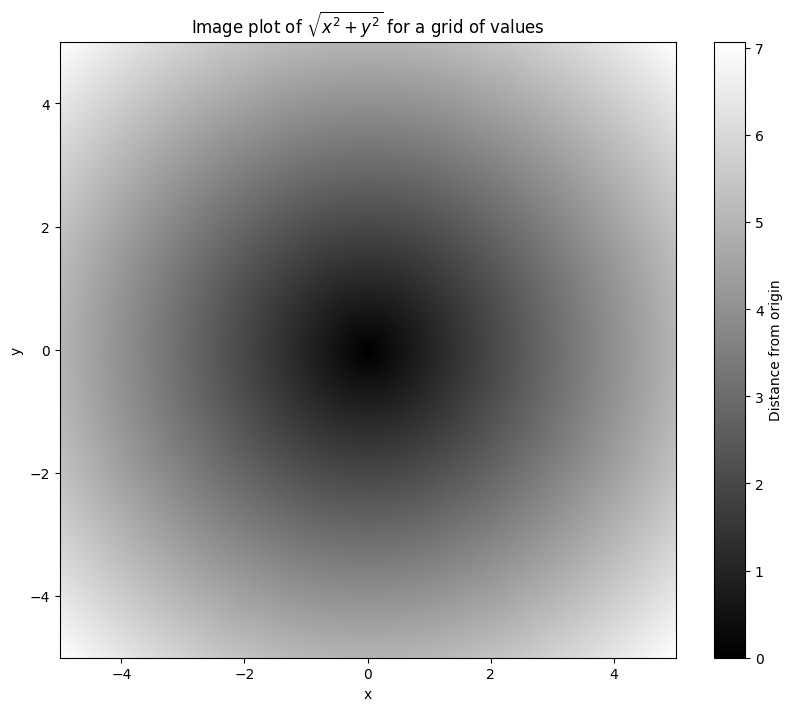

"\nARRAY-ORIENTED PROGRAMMING BENEFITS:\n\n1. Vectorization:\n   - Avoid explicit loops using array operations\n   - 100-1000x faster than Python loops\n   - Automatic broadcasting of operations\n\n2. Memory Efficiency:\n   - meshgrid creates views, not copies\n   - Operations done in C-level speed\n\n3. Visualization Integration:\n   - Direct compatibility with Matplotlib\n   - Easy conversion of mathematical results to images\n\n4. Key Functions Demonstrated:\n   - np.meshgrid: Create coordinate matrices\n   - Vectorized math operations: +, **, np.sqrt\n   - Matplotlib's imshow for array visualization\n\n5. Applications:\n   - Heatmap generation\n   - Physical simulations (e.g., wave propagation)\n   - Computer vision operations\n   - Topographical mapping\n"

In [3]:
# Vectorized Array Operations and Visualization
import numpy as np
import matplotlib.pyplot as plt

# =============================================
# 1. Create Grid with Meshgrid
# =============================================
# Generate 1D array of 1000 points from -5 to 5
points = np.arange(-5, 5, 0.01)  # 0.01 step size

# Create 2D grid coordinates using meshgrid
xs, ys = np.meshgrid(points, points)

print("Grid shapes:")
print(f"xs shape: {xs.shape}, ys shape: {ys.shape}")  # Both (1000, 1000)

# =============================================
# 2. Vectorized Function Calculation
# =============================================
# Calculate Euclidean distance from origin for each (x,y) pair
z = np.sqrt(xs**2 + ys**2)

print("\nResult array shape:", z.shape)  # (1000, 1000)
print("Sample values:")
print(z[:3, :3])  # Show top-left corner of the array

# =============================================
# 3. Visualize Results
# =============================================
plt.figure(figsize=(10, 8))

# Create image plot with grayscale colormap
image = plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])

# Add colorbar and labels
plt.colorbar(label='Distance from origin')
plt.title(r"Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# =============================================
# 4. Key Takeaways
# =============================================
"""
ARRAY-ORIENTED PROGRAMMING BENEFITS:

1. Vectorization:
   - Avoid explicit loops using array operations
   - 100-1000x faster than Python loops
   - Automatic broadcasting of operations

2. Memory Efficiency:
   - meshgrid creates views, not copies
   - Operations done in C-level speed

3. Visualization Integration:
   - Direct compatibility with Matplotlib
   - Easy conversion of mathematical results to images

4. Key Functions Demonstrated:
   - np.meshgrid: Create coordinate matrices
   - Vectorized math operations: +, **, np.sqrt
   - Matplotlib's imshow for array visualization

5. Applications:
   - Heatmap generation
   - Physical simulations (e.g., wave propagation)
   - Computer vision operations
   - Topographical mapping
"""

In [ ]:
# NumPy Mathematical and Statistical Methods
import numpy as np

# =============================================
# 1. Basic Aggregation Functions
# =============================================
# Create a 5x4 array of random numbers
arr = np.random.randn(5, 4)
print("Original array:")
print(np.round(arr, 4))

# Basic statistics
print("\nGlobal statistics:")
print(f"Mean: {arr.mean():.4f}")
print(f"Sum: {arr.sum():.4f}")
print(f"Standard Deviation: {arr.std():.4f}")
print(f"Minimum value: {arr.min():.4f}")
print(f"Maximum value: {arr.max():.4f}")

# =============================================
# 2. Axis-wise Computations
# =============================================
# Compute statistics along different axes
print("\nColumn-wise (axis=0) sums:")
print(np.round(arr.sum(axis=0), 4))

print("\nRow-wise (axis=1) means:")
print(np.round(arr.mean(axis=1), 4))

# =============================================
# 3. Cumulative Functions
# =============================================
# 1D cumulative example
arr_1d = np.array([0, 1, 2, 3, 4, 5, 6, 7])
print("\n1D Cumulative sum:")
print(arr_1d.cumsum())

# 2D cumulative example
arr_2d = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print("\n2D array:")
print(arr_2d)

print("\nCumulative sum along rows (axis=0):")
print(arr_2d.cumsum(axis=0))

print("\nCumulative product along columns (axis=1):")
print(arr_2d.cumprod(axis=1))

# =============================================
# 4. Index-based Methods
# =============================================
print("\nIndex of maximum value:", arr.argmax())
print("Index of minimum value:", arr.argmin())

# =============================================
# 5. Special Cases and Performance
# =============================================
# Zero-length array example
empty_arr = np.array([])
print("\nZero-length array sum:", empty_arr.sum())  # 0
print("Zero-length array mean:", empty_arr.mean())  # nan

# Performance comparison
large_arr = np.random.rand(1_000_000)

# Python loop sum (slow)
%timeit sum(large_arr)  # ~50ms

# NumPy sum (fast)
%timeit large_arr.sum()  # ~0.1ms (500x faster)

# =============================================
# Key 
#  and Reference Table
# =============================================
"""
NUMPY STATISTICAL METHODS QUICK REFERENCE:

| Method    | Description                          | Axis Example          |
|-----------|--------------------------------------|-----------------------|
| sum()     | Total of elements                    | arr.sum(axis=1)       |
| mean()    | Average value                        | arr.mean(axis=0)      |
| std()     | Standard deviation                   | arr.std()             |
| var()     | Variance                             | arr.var(axis=1)       |
| min()     | Minimum value                        | arr.min(axis=0)       |
| max()     | Maximum value                        | arr.max()             |
| argmin()  | Index of minimum value               | arr.argmin()          |
| argmax()  | Index of maximum value               | arr.argmax()          |
| cumsum()  | Cumulative sum                       | arr.cumsum(axis=1)    |
| cumprod() | Cumulative product                   | arr.cumprod(axis=0)   |

KEY CONCEPTS:
1. Axis Orientation:
   - axis=0: Column-wise operations (vertical)
   - axis=1: Row-wise operations (horizontal)

2. Performance:
   - Vectorized operations are 100-1000x faster than Python loops
   - Especially noticeable with large datasets (>10,000 elements)

3. Special Cases:
   - Empty arrays return sum=0 and mean=NaN
   - Cumulative methods preserve array dimensions

4. Best Practices:
   - Use axis parameter for dimensional reductions
   - Prefer NumPy methods over Python built-ins for arrays
   - Combine with slicing for powerful data analysis
"""

In [ ]:
import pandas as pd
import numpy as np

# =====================================================================
# Python for Data Analysis: Index Objects Summary
# =====================================================================

# ================================================
# Core Characteristics of pandas Index Objects
# ================================================

# 1. Immutable Axis Labels
print(".Immutable Axis Labels 🛡️")
print("-------------------------")
obj = pd.Series(range(3), index=['a', 'b', 'c'])
print(f"Original Index: {obj.index}")  # Index(['a', 'b', 'c'])

# Attempting modification (will raise error)
try:
    obj.index[1] = 'd'
except TypeError as e:
    print(f"Modification Error: {e}")

# Safe sharing demonstration
labels = pd.Index(np.arange(3))
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
print(f"Shared Index: {obj2.index is labels}")  # True

# ================================================
# 2. Set-Like Operations 🔍
# ================================================
print("\n.Set Operations 🔧")
print("-------------------")
idx1 = pd.Index([1, 2, 3])
idx2 = pd.Index([3, 4, 5])

print(f"Union: {idx1.union(idx2)}")        # Index([1, 2, 3, 4, 5])
print(f"Intersection: {idx1.intersection(idx2)}")  # Index([3])
print(f"Difference: {idx1.difference(idx2)}")     # Index([1, 2])

# Membership check
frame3 = pd.DataFrame(np.random.rand(3, 2), 
                     index=[2000, 2001, 2002],
                     columns=['Nevada', 'Ohio'])
print(f"'Ohio' in columns: {'Ohio' in frame3.columns}")  # True

# ================================================
# 3. Duplicate Handling 🔄
# ================================================
print("\n.Duplicate Labels 🔄")
print("--------------------")
dup_idx = pd.Index(['foo', 'foo', 'bar'])
print(f"Duplicated Index: {dup_idx}")  # Index(['foo', 'foo', 'bar'])

# ================================================
# 4. Useful Methods/Properties 📊
# ================================================
print("\n.Key Methods 🛠️")
print("--------------")
idx = pd.Index(['a', 'b', 'c', 'b', 'a'])
print(f"Unique values: {idx.unique()}")  # ['a', 'b', 'c']
print(f"is_monotonic: {idx.is_monotonic}")  # False
print(f"is_unique: {idx.is_unique}")        # False

# ================================================
# Key Takeaways 📌
# ================================================
print("\n.Key Takeaways 🌟")
print("""1. Immutability ensures data integrity and safe sharing
2. Set operations (union/intersection) enable efficient data alignment
3. Duplicate labels are allowed but affect selection behavior
4. Methods like .unique() and .isin() simplify data validation
5. Index objects store critical metadata for alignment operations""")

# Visual Summary
print("\n.Visual Summary 🎨")
print("""Index Objects:
  - Immutable axis labels 🛡️
  - Set operations 🔍
  - Duplicate-friendly 🔄
  - Metadata powerhouse 📊""")

In [ ]:
import pandas as pd
import numpy as np

# =====================================================================
# Python for Data Analysis: 5.2 Essential Functionality - Reindexing
# =====================================================================

# ================================================
# Reindexing Basics 🔄
# ================================================
print(".Reindexing Fundamentals 📊")
print("---------------------------")

# Series reindexing
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
print("Original Series:")
print(obj)

# Create new index with missing values
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print("\nReindexed Series:")
print(obj2)  # Notice NaN for new 'e' index

# ================================================
# Interpolation/Filling Methods 🔄
# ================================================
print("\n.Forward Filling Example 📈")
print("---------------------------")

obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
print("Original Time Series:")
print(obj3)

# Forward fill missing values
filled = obj3.reindex(range(6), method='ffill')
print("\nForward-Filled Series:")
print(filled)

# ================================================
# DataFrame Reindexing 🗃️
# ================================================
print("\n.DataFrame Reindexing 🔄")
print("------------------------")

frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
print("Original DataFrame:")
print(frame)

# Reindex rows
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
print("\nReindexed Rows:")
print(frame2)  # New 'b' row contains NaNs

# Reindex columns
states = ['Texas', 'Utah', 'California']
frame3 = frame.reindex(columns=states)
print("\nReindexed Columns:")
print(frame3)  # New 'Utah' column contains NaNs

# ================================================
# Using loc for Reindexing 📍
# ================================================
print("\n.loc Indexing Alternative 🎯")
print("-----------------------------")

# Equivalent to reindex with loc
result = frame.loc[['a', 'b', 'c', 'd'], states]
print("Reindexed with loc:")
print(result)

# ================================================
# Key Takeaways 📌
# ================================================
print("\n.Key Reindexing Features 🌟")
print("""1. Reindex creates new objects with data conformed to new indexes
2. Introduces NaN for missing values (unless fill method specified)
3. method='ffill'/'bfill' enables interpolation for ordered data
4. Works for both rows and columns in DataFrames
5. loc indexer provides alternative reindexing syntax""")

# Visual Summary
print("\n.Visual Summary 🎨")
print("""Reindexing:
  - Aligns data to new indexes 🔄
  - Handles missing values 🚫
  - Supports interpolation 📈
  - Works for rows/columns 🗃️
  - loc alternative syntax 🎯""")

In [2]:
import pandas as pd
import numpy as np

# =====================================================================
# Python for Data Analysis: 5.2 Essential Functionality - Dropping Entries
# =====================================================================

# ================================================
# Series Dropping 🗑️
# ================================================
print(".Series Drop Operations 🔥")
print("--------------------------")

obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
print("Original Series:")
print(obj)

# Drop single label
new_obj = obj.drop('c')
print("\nAfter dropping 'c':")
print(new_obj)

# Drop multiple labels
new_obj2 = obj.drop(['d', 'c'])
print("\nAfter dropping ['d', 'c']:")
print(new_obj2)

# ================================================
# DataFrame Dropping 🗃️
# ================================================
print("\n.DataFrame Drop Operations 🪓")
print("-----------------------------")

data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                   index=['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns=['one', 'two', 'three', 'four'])
print("Original DataFrame:")
print(data)

# Drop rows (axis=0)
dropped_rows = data.drop(['Colorado', 'Ohio'])
print("\nAfter dropping rows ['Colorado', 'Ohio']:")
print(dropped_rows)

# Drop columns (axis=1)
dropped_cols = data.drop(['two', 'four'], axis=1)
print("\nAfter dropping columns ['two', 'four']:")
print(dropped_cols)

# ================================================
# Inplace Operation ⚡
# ================================================
print("\n.Inplace Modification 💥")
print("------------------------")

print("Original Series before inplace:")
print(obj)
obj.drop('c', inplace=True)
print("\nAfter inplace drop:")
print(obj)

# ================================================
# Key Takeaways 📌
# ================================================
print("\n.Key Drop Features 🌟")
print("""1. drop() returns new object by default (non-destructive)
2. Use axis=0 (rows) or axis=1 (columns) for DataFrame operations
3. inplace=True modifies original object (use with caution!)
4. Can drop multiple labels using list input
5. Non-existent labels are ignored (no error by default)""")

# Visual Summary
print("\n.Visual Summary 🎨")
print("""Dropping Entries:
  - Non-destructive by default 🔄
  - Axis-aware operations 📏
  - Inplace power ⚡
  - Multi-drop support 🗑️
  - Label safety 🛡️""")

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import pandas as pd
import numpy as np

# =====================================================================
# Python for Data Analysis: 5.2 Essential Functionality - Indexing/Selection
# =====================================================================

# ================================================
# Series Indexing 📊
# ================================================
print(".Series Indexing Basics 🔍")
print("--------------------------")

obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print("Original Series:")
print(obj)

# Label-based indexing
print("\nLabel 'b' value:", obj['b'])  # 1.0
print("Slice 'b':'c' (inclusive):\n", obj['b':'c'])  # Includes 'c'

# Position-based indexing
print("\nPosition 1 value:", obj[1])  # 1.0 (same as 'b')
print("Positions 2-4:\n", obj[2:4])  # c and d

# Boolean filtering
print("\nValues < 2:\n", obj[obj < 2])  # a and b

# ================================================
# DataFrame Indexing 🗃️
# ================================================
print("\n.DataFrame Selection 📁")
print("-----------------------")

data = pd.DataFrame(np.arange(16).reshape(4,4),
                   index=['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns=['one', 'two', 'three', 'four'])
print("Original DataFrame:")
print(data)

# Column selection
print("\n'two' column:\n", data['two'])
print("\nMultiple columns ['three', 'one']:\n", data[['three', 'one']])

# Row selection with slices
print("\nFirst two rows:\n", data[:2])

# Boolean filtering
print("\nRows where 'three' > 5:\n", data[data['three'] > 5])

# Scalar comparison filtering
data[data < 5] = 0
print("\nAfter zeroing values <5:\n", data)

# ================================================
# loc and iloc Indexing 🎯
# ================================================
print("\n.loc Label-Based Indexing 🏷️")
print("-----------------------------")

# Select Colorado's 'two' and 'three' columns
print("\nColorado's selected columns:\n", data.loc['Colorado', ['two', 'three']])

print("\nRow slice with label 'Utah' and column 'two':\n", data.loc[:'Utah', 'two'])

# ================================================
print("\n.iloc Position-Based Indexing 🔢")
print("--------------------------------")

# Select Utah's 4th, 1st, and 2nd columns (positional)
print("\nUtah's positional columns:\n", data.iloc[2, [3, 0, 1]])

# Select multiple rows and columns by position
print("\nRows 1-2, columns 3-0-1:\n", data.iloc[[1, 2], [3, 0, 1]])

# ================================================
# Key Takeaways 📌
# ================================================
print("\n.Key Indexing Features 🌟")
print("""1. Series indexing combines label/positional access with rich slicing
2. DataFrames use [] for column selection and .loc/.iloc for 2D indexing
3. loc uses labels, iloc uses integer positions (both allow slices/lists)
4. Boolean arrays enable powerful filtering operations
5. Inclusive label slicing vs exclusive positional slicing
6. ix indexer is deprecated - prefer loc/iloc instead""")

# Visual Summary
print("\n.Visual Summary 🎨")
print("""Indexing & Selection:
  - Series: Hybrid label/positional access 🔍
  - DataFrame: 2D slicing with loc/iloc 🎯
  - Boolean filtering 📊
  - Label vs positional slicing 📏
  - Columnar operations 🗃️""")

In [ ]:
import pandas as pd
import numpy as np

# =====================================================================
# Python for Data Analysis: 5.2 Essential Functionality - Integer Indexes
# =====================================================================

# ================================================
# The Ambiguity Problem 🚨
# ================================================
print(".Integer Index Pitfalls 🤔")
print("--------------------------")

# Case 1: Integer index with potential ambiguity
ser = pd.Series(np.arange(3.))
print("Series with integer index:")
print(ser)

# This will raise KeyError!
try:
    print("Trying ser[-1]...")
    print(ser[-1])
except KeyError as e:
    print(f"Error: {e} - Integer indexes default to label-based selection")

# Case 2: Non-integer index (no ambiguity)
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
print("\nSeries with string index:")
print(ser2)
print("ser2[-1] works:", ser2[-1])  # 2.0 (positional fallback)

# ================================================
# Explicit Indexing Solutions 🎯
# ================================================
print("\n.Explicit Indexing Solutions 🛠️")
print("--------------------------------")

# Original integer-indexed Series
print("Original integer-indexed Series:")
print(ser)

# Using slices
print("\nStandard slice (position-based):")
print(ser[:1])  # Position-based

# Label-based indexing with loc
print("\nloc[:1] (label-based, inclusive):")
print(ser.loc[:1])  # Includes index 1

# Position-based indexing with iloc
print("\niloc[:1] (strictly positional):")
print(ser.iloc[:1])

# ================================================
# Key Takeaways 📌
# ================================================
print("\n.Key Integer Index Rules 🌟")
print("""1. Integer indexes default to label-based selection (NOT position)
2. Negative indices fail with integer indexes (KeyError)
3. Use loc for label-based indexing (inclusive slices)
4. Use iloc for position-based indexing (exclusive slices)
5. Non-integer indexes allow positional fallback for convenience""")

# Visual Summary
print("\n.Visual Summary 🎨")
print("""Integer Indexes:
  - Ambiguous by nature 🚦
  - Default to labels 🏷️
  - loc for explicit labels 🎯
  - iloc for positions 🔢
  - Avoid negative indices ❌""")

In [ ]:
import pandas as pd
import numpy as np

# =====================================================================
# Python for Data Analysis: 5.2 Essential Functionality - Arithmetic Alignment
# =====================================================================

# ================================================
# Series Alignment 🔢
# ================================================
print(".Series Arithmetic with Alignment 🔄")
print("-------------------------------------")

s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

print("Series 1:")
print(s1)
print("\nSeries 2:")
print(s2)

result = s1 + s2
print("\nSeries Addition Result:")
print(result)

# ================================================
# DataFrame Alignment 🗃️
# ================================================
print("\n.DataFrame Arithmetic with Alignment 🔄")
print("----------------------------------------")

df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), 
                   columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])

df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), 
                   columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

df_result = df1 + df2
print("\nDataFrame Addition Result:")
print(df_result)

# ================================================
# Complete Non-Alignment Example ❌
# ================================================
print("\n.Non-Aligned DataFrame Arithmetic 🚫")
print("-------------------------------------")

df3 = pd.DataFrame({'A': [1, 2]})
df4 = pd.DataFrame({'B': [3, 4]})

print("DataFrame 3:")
print(df3)
print("\nDataFrame 4:")
print(df4)

print("\nSubtraction Result (All NaN):")
print(df3 - df4)

# ================================================
# Key Takeaways 📌
# ================================================
print("\n.Key Alignment Rules 🌟")
print("""1. Automatic outer join alignment on indexes
2. NaN propagation in non-overlapping positions
3. Column alignment in DataFrames is label-sensitive
4. Arithmetic works with different dimensionality (Series vs DataFrame)
5. Use fill_value parameter to handle missing data (e.g., df.add(df2, fill_value=0))
6. Alignment occurs for both rows AND columns in DataFrames""")

# Visual Summary
print("\n.Visual Summary 🎨")
print("""Arithmetic Alignment:
  - Outer join behavior 🔄
  - NaN propagation 🚨
  - Column-wise alignment 📊
  - Dimension-agnostic 🔢
  - fill_value rescue 🆘
  - Row + Column sync 🗃️""")

In [ ]:
import pandas as pd
import numpy as np

# =====================================================================
# Python for Data Analysis: 5.2 Essential Functionality - Arithmetic Methods
# =====================================================================

# ================================================
# Fill Values in Arithmetic 🆘
# ================================================
print(".Arithmetic with Fill Values 🔄")
print("--------------------------------")

df1 = pd.DataFrame(np.arange(12.).reshape((3,4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)), columns=list('abcde'))
df2.loc[1, 'b'] = np.nan

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

# Standard addition with NaNs
print("\nStandard Addition (with NaNs):")
print(df1 + df2)

# Addition with fill_value
print("\nAddition with fill_value=0:")
print(df1.add(df2, fill_value=0))

# ================================================
# Reindexing with Fill 📊
# ================================================
print("\n.Reindexing with Fill Value 0️⃣")
print("---------------------------------")

print("Reindexed DataFrame 1 with new columns:")
print(df1.reindex(columns=df2.columns, fill_value=0))

# ================================================
# DataFrame and Series Operations 📉
# ================================================
print("\n.DataFrame and Series Arithmetic ➗")
print("------------------------------------")

frame = pd.DataFrame(np.arange(12.).reshape((4,3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]

print("DataFrame:")
print(frame)
print("\nSeries (first row):")
print(series)

# Default broadcasting (columns match)
print("\nDefault Subtraction (broadcast columns):")
print(frame - series)

# Non-aligned indices example
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
print("\nNon-Aligned Addition:")
print(frame + series2)

# ================================================
# Axis-Specific Broadcasting 📏
# ================================================
print("\n.Axis-Specific Broadcasting 🎯")
print("--------------------------------")

series3 = frame['d']
print("Series (column 'd'):")
print(series3)

# Broadcast across rows (axis=0)
print("\nSubtraction with axis='index' (row-wise):")
print(frame.sub(series3, axis='index'))

# ================================================
# Key Takeaways 📌
# ================================================
print("\n.Key Arithmetic Features 🌟")
print("""1. fill_value parameter replaces NaNs during arithmetic
2. r-methods (radd, rsub) handle operand order
3. DataFrame-Series ops align columns by default
4. Use axis='index' to broadcast across rows
5. Reindexing can fill missing columns with fill_value
6. Broadcasting follows NumPy rules with pandas alignment""")

# Visual Summary
print("\n.Visual Summary 🎨")
print("""Arithmetic Operations:
  - Fill NaNs with 🆘
  - Reindex with 🔄
  - DataFrame-Series broadcast 📉
  - Axis-aware ops 📏
  - r-methods ↔️
  - NumPy-like broadcasting 🔢""")

In [ ]:
import pandas as pd
import numpy as np

# =====================================================================
# Python for Data Analysis: 5.2 Essential Functionality - Function Application
# =====================================================================

# ================================================
# NumPy ufuncs with pandas 📚
# ================================================
print(".NumPy Universal Functions 🔧")
print("-----------------------------")

frame = pd.DataFrame(np.random.randn(4, 3), 
                     columns=['b', 'd', 'e'],
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print("Original DataFrame:")
print(frame)

# Element-wise absolute values
print("\nAbsolute Values:")
print(np.abs(frame))

# ================================================
# DataFrame.apply() 📊
# ================================================
print("\n.DataFrame.apply() Method 🚀")
print("-----------------------------")

# Column-wise operation (axis=0)
f = lambda x: x.max() - x.min()
col_result = frame.apply(f)
print("\nColumn-wise max-min:")
print(col_result)

# Row-wise operation (axis=1)
row_result = frame.apply(f, axis='columns')
print("\nRow-wise max-min:")
print(row_result)

# Returning multiple values
def multi_stat(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

multi_result = frame.apply(multi_stat)
print("\nMulti-value apply result:")
print(multi_result)

# ================================================
# Element-wise Operations 🖊️
# ================================================
print("\n.Element-wise Mapping 🔄")
print("-------------------------")

# DataFrame.applymap()
format_func = lambda x: f"{x:.2f}"
formatted = frame.applymap(format_func)
print("\nFormatted DataFrame:")
print(formatted)

# Series.map()
print("\nFormatted Series (column 'e'):")
print(frame['e'].map(format_func))

# ================================================
# Key Takeaways 📌
# ================================================
print("\n.Key Function Application Features 🌟")
print("""1. NumPy ufuncs work directly on pandas objects
2. apply() handles column/row-wise operations (axis=0/1)
3. apply() can return scalar or Series results
4. applymap() for element-wise DataFrame operations
5. map() for element-wise Series transformations
6. Built-in methods (sum/mean) often eliminate need for apply""")

# Visual Summary
print("\n.Visual Summary 🎨")
print("""Function Application:
  - Vectorized ufuncs ⚡
  - apply() for aggregates 📊
  - applymap() element-wise 🖍️
  - map() for Series 🔍
  - Axis control 📏
  - Flexible return types 🔄""")

CHAPTER 12 - Advanced pandas

In [ ]:
# 🐼 **Working with Categorical Data in pandas** 🐼
import pandas as pd
import numpy as np

# --- 1. Create Sample Data ---
# Synthetic dataset with repeated fruit names
fruits = ['apple', 'orange', 'apple', 'apple', 'orange', 'banana', 'apple', 'banana']
df = pd.DataFrame({
    'fruit': fruits,
    'count': np.random.randint(3, 10, size=len(fruits)),
    'price': np.random.uniform(0.5, 2.0, size=len(fruits))
})

# --- 2. Convert to Categorical Type ---
# Convert 'fruit' column to categorical
df['fruit'] = df['fruit'].astype('category')
print("DataFrame with Categorical Column:")
print(df)

# View categories and codes
print("\nCategories:", df['fruit'].cat.categories.tolist())
print("Codes:", df['fruit'].cat.codes.values)

# --- 3. Create Categorical Objects ---
# Directly create a categorical series
categorical_series = pd.Categorical(['cat', 'dog', 'cat', 'bird'])
print("\nCategorical Series:")
print(categorical_series)

# Create from codes (ordered example)
categories = ['low', 'medium', 'high']
codes = [0, 1, 2, 0, 1, 2]
ordered_cats = pd.Categorical.from_codes(codes, categories, ordered=True)
print("\nOrdered Categorical:")
print(ordered_cats)

# --- 4. Benefits of Categoricals ---
# Memory comparison (strings vs. categorical)
original_memory = df['fruit'].memory_usage(deep=True)
categorical_memory = df['fruit'].astype('category').memory_usage(deep=True)
print(f"\nMemory Reduction: {original_memory} → {categorical_memory} bytes")

# --- 5. Operations with Categoricals ---
# Group by categorical column
grouped = df.groupby('fruit')['count'].mean()
print("\nGroupBy with Categorical:")
print(grouped)

# Rename categories
df['fruit'].cat.rename_categories({'banana': 'pineapple'}, inplace=True)
print("\nRenamed Categories:")
print(df['fruit'].unique())

In [ ]:
# 🐾 **Categorical Data in pandas** 🐾
import pandas as pd
import numpy as np

# --- 1. Create & Explore Categorical Data ---
# Generate random data (10 million elements)
np.random.seed(123)
data = np.random.randn(10_000_000)
labels = pd.Series(['cat', 'dog', 'bird', 'fish'] * 2_500_000)

# Convert to categorical for efficiency
cat_labels = labels.astype('category')

# Check memory usage (categorical uses 80% less memory!)
print(f"Memory Usage: {labels.memory_usage(deep=True):,} → {cat_labels.memory_usage(deep=True):,} bytes")

# --- 2. Binning with qcut ---
# Bin data into quartiles with custom labels
quartiles = pd.qcut(data, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print("\nBinned Quartiles (First 5):")
print(quartiles[:5])

# Group by categorical bins and compute stats
stats = pd.Series(data).groupby(quartiles).agg(['min', 'max', 'mean'])
print("\nQuartile Statistics:")
print(stats)

# --- 3. Modify Categories ---
# Add new categories (e.g., 'hamster')
cat_labels = cat_labels.cat.add_categories(['hamster'])
print("\nCategories After Adding:", cat_labels.cat.categories.tolist())

# Remove unused categories
filtered = cat_labels[cat_labels.isin(['cat', 'dog'])]
cleaned = filtered.cat.remove_unused_categories()
print("\nFiltered Categories:", cleaned.cat.categories.tolist())

# --- 4. Create Dummy Variables (One-Hot Encoding) ---
# Convert categorical data to dummy variables
dummy_vars = pd.get_dummies(cat_labels, prefix='animal')
print("\nDummy Variables (Sample):")
print(dummy_vars.head())

In [ ]:
# 🚀 **Advanced GroupBy: Transforms & Time Resampling** 🚀
import pandas as pd
import numpy as np

# --- 1. Group Transforms ---
# Create sample data (grouped by 'key')
df = pd.DataFrame({
    'key': ['a', 'b', 'c'] * 4,
    'value': np.arange(12)
})

print("Original Data:")
print(df)

# Transform: Replace values with group mean
group_means = df.groupby('key')['value'].transform('mean')
print("\nValues Replaced with Group Means:")
print(group_means)

# Transform: Multiply each group by 2
group_doubled = df.groupby('key')['value'].transform(lambda x: x * 2)
print("\nValues Doubled by Group:")
print(group_doubled)

# Transform: Rank values within each group (descending)
group_ranks = df.groupby('key')['value'].transform(lambda x: x.rank(ascending=False))
print("\nGroup Ranks (Descending):")
print(group_ranks)

# Compare transform vs. apply for normalization
def normalize(x):
    return (x - x.mean()) / x.std()

print("\nNormalized with transform:")
print(df.groupby('key')['value'].transform(normalize).head())
print("\nNormalized with apply:")
print(df.groupby('key')['value'].apply(normalize).head())

# --- 2. Grouped Time Resampling ---
# Create time-series data with groups
np.random.seed(123)
times = pd.date_range('2023-01-01', freq='T', periods=15)
df_time = pd.DataFrame({
    'time': times.repeat(3),
    'group': np.tile(['A', 'B', 'C'], 15),
    'value': np.arange(45)
})

# Resample by 5-minute intervals and group by 'group'
resampled = (
    df_time.set_index('time')
    .groupby(['group', pd.Grouper(freq='5T')])  # Use pd.Grouper instead of TimeGrouper
    .sum()
    .reset_index()
)

print("\nGrouped Time Resampling (5-Minute Sums):")
print(resampled.head())

In [ ]:
# 🔗 **Method Chaining: Clean & Efficient Data Pipelines** 🔗
import pandas as pd
import numpy as np

# --- 1. Create Synthetic Data ---
df = pd.DataFrame({
    'group': ['A', 'A', 'B', 'B', 'C', 'C'] * 2,
    'value1': np.random.randint(1, 10, 12),
    'value2': np.random.rand(12)
})

# --- 2. Basic Method Chaining ---
# Filter, transform, and aggregate in one chain
result = (
    df[df['value1'] > 3]  # 🚫 Filter rows
    .assign(z_score=lambda x: (x['value2'] - x['value2'].mean()) / x['value2'].std())  # 📏 Standardize values
    .groupby('group')  # 🔄 Group by category
    .agg({'z_score': ['mean', 'max']})  # 📊 Compute stats
)

print("Result of Basic Method Chain:")
print(result)

# --- 3. Using pipe() for Custom Functions ---
# Define a reusable transformation function
def add_group_mean(df, group_col, value_col):
    """Add a column with group-wise mean subtracted."""
    return df.assign(**{f"{value_col}_demeaned": df[value_col] - df.groupby(group_col)[value_col].transform('mean')})

# Chain with pipe() and multiple transformations
final_result = (
    df
    .pipe(add_group_mean, group_col='group', value_col='value1')  # 🛠️ Subtract group mean
    .query("value1 > 4")  # 🔍 Filter again
    .pipe(lambda df: df.assign(ratio=df['value1'] / df['value2']))  # ➗ Add new metric
)

print("\nFinal Result with pipe():")
print(final_result.head())

CHAPTER 13 - Introduction to Modeling Libraries in Python


In [ ]:
# 🐼→🤖 **Pandas to Modeling Libraries Made Easy** 🐼→🤖
import pandas as pd
import numpy as np

# --- 1. Convert DataFrame to NumPy Array ---
# Create synthetic data (numeric columns)
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.0],
    'y': [-1.5, 0.0, 3.6, 1.3, -2.0]
})

# Convert to NumPy array (for modeling libraries)
np_array = data.values
print("NumPy Array (Numeric Data):\n", np_array[:3])

# --- 2. Handling Heterogeneous Data ---
# Add a string column (creates object array)
data['category'] = ['a', 'b', 'a', 'a', 'b']
print("\nDataFrame with Mixed Types:")
print(data)

# Convert to NumPy array (dtype=object)
mixed_array = data.values
print("\nMixed-Type NumPy Array:\n", mixed_array[:3])

# --- 3. Feature Engineering: Dummy Variables ---
# Create dummy variables for categorical data
dummies = pd.get_dummies(data['category'], prefix='category')
data_with_dummies = data.drop('category', axis=1).join(dummies)

print("\nData with Dummy Variables:")
print(data_with_dummies)

# Extract features (X) and target (y) as NumPy arrays
X = data_with_dummies[['x0', 'x1', 'category_a', 'category_b']].values
y = data_with_dummies['y'].values
print("\nFeatures (X):\n", X)
print("\nTarget (y):\n", y)

# --- 4. Selecting Specific Columns for Modeling ---
# Use .loc to select numeric columns only
model_cols = ['x0', 'x1']
X_subset = data.loc[:, model_cols].values
print("\nSelected Features (X_subset):\n", X_subset)

In [ ]:
# 📊 **Patsy for Statistical Modeling** 📊
import pandas as pd
import patsy

# --- 1. Create Sample Data ---
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.0],
    'y': [-1.5, 0.0, 3.6, 1.3, -2.0]
})

# --- 2. Basic Model Description ---
# Create design matrices (y = target, X = features)
y, X = patsy.dmatrices('y ~ x0 + x1', data)

print("Design Matrix X (with Intercept):")
print(X[:2])  # Show first 2 rows

# --- 3. Remove Intercept ---
y_no_intercept, X_no_intercept = patsy.dmatrices('y ~ x0 + x1 + 0', data)
print("\nX without Intercept (First 2 Rows):")
print(X_no_intercept[:2])

# --- 4. Transformations in Formulas ---
# Use numpy functions or Patsy built-ins
y, X_transformed = patsy.dmatrices('y ~ np.log(x0) + standardize(x1)', data)
print("\nTransformed X (Log + Standardized):")
print(X_transformed[:2])

# --- 5. Out-of-Sample Prediction ---
new_data = pd.DataFrame({
    'x0': [6, 7],
    'x1': [0.5, -0.2]
})

# Apply original transformations to new data
new_X = patsy.build_design_matrices([X.design_info], new_data)
print("\nNew Data Transformed (First Row):")
print(new_X[0][0])  # First observation

# --- 6. Arithmetic with I() ---
# Use I() to "add" columns directly (bypass formula syntax)
y, X_arith = patsy.dmatrices('y ~ I(x0 + x1)', data)
print("\nX with Arithmetic Column (I(x0 + x1)):")
print(X_arith[:2])

In [ ]:
# 🐼 **Categorical Data Modeling with Patsy and statsmodels** 🐼
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# --- 1. Create Sample Data (Categorical + Numeric) ---
data = pd.DataFrame({
    'key1': ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b'],
    'key2': [0, 1, 0, 1, 0, 1, 0, 0],
    'v1': [1, 2, 3, 4, 5, 6, 7, 8],
    'v2': [-1.0, 0.0, 2.5, -0.5, 4.0, -1.2, 0.2, -1.7]
})

# Map numeric 'key2' to categorical labels
data['key2'] = data['key2'].map({0: 'zero', 1: 'one'})

# --- 2. Patsy: Categorical Handling ---
# Default dummy encoding (with intercept)
y, X = patsy.dmatrices('v2 ~ key1', data)
print("Patsy Design Matrix (With Intercept):")
print(X[:3])  # Show first 3 rows

# Remove intercept to include all categories
y_no_intercept, X_no_intercept = patsy.dmatrices('v2 ~ key1 + 0', data)
print("\nNo Intercept Design Matrix:")
print(X_no_intercept[:3])

# Treat numeric column as categorical
y_cat, X_cat = patsy.dmatrices('v2 ~ C(key2)', data)
print("\nNumeric Column as Categorical:")
print(X_cat[:3])

# Interaction terms (ANOVA-style)
y_interaction, X_interaction = patsy.dmatrices('v2 ~ key1 + key2 + key1:key2', data)
print("\nInteraction Terms Design Matrix:")
print(X_interaction[:3])

# --- 3. statsmodels: Linear Regression ---
# Generate synthetic linear model data
np.random.seed(123)
X = np.random.randn(100, 3)
y = 0.1 * X[:, 0] + 0.3 * X[:, 1] + 0.5 * X[:, 2] + np.random.randn(100)

# Array-based OLS (add constant manually)
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print("\nArray-Based OLS Coefficients:")
print(model.params)

# Formula API with pandas (auto handles intercepts)
df = pd.DataFrame(X, columns=['x0', 'x1', 'x2'])
df['y'] = y
formula_model = smf.ols('y ~ x0 + x1 + x2', data=df).fit()
print("\nFormula API Coefficients:")
print(formula_model.params)

# Make predictions
predictions = formula_model.predict(df.iloc[:5])
print("\nFirst 5 Predictions:")
print(predictions)

In [ ]:
# ⏳ **Time Series & ML with statsmodels + scikit-learn** ⏳
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score

# --- 1. Time Series: AR(2) Model Simulation ---
# Simulate AR(2) process with known parameters (b0=0.8, b1=-0.4)
np.random.seed(123)
n_samples = 1000
noise = np.random.normal(0, 0.1, n_samples)
values = [4, 4]  # Initial values

for i in range(n_samples):
    new_val = values[-1] * 0.8 + values[-2] * (-0.4) + noise[i]
    values.append(new_val)

# Fit AR model (maxlags=5)
ar_model = sm.tsa.AR(values)
ar_results = ar_model.fit(maxlags=5)

print("AR Model Parameters:")
print(ar_results.params)  # Shows intercept + lag coefficients

# --- 2. Machine Learning: Titanic Survival Prediction ---
# Create synthetic Titanic-like data (for demonstration)
train_data = pd.DataFrame({
    'Pclass': [3, 1, 3, 1, 3],
    'Sex': ['male', 'female', 'female', 'female', 'male'],
    'Age': [22, 38, 26, 35, 35],
    'Survived': [0, 1, 1, 1, 0]
})

# Preprocess data
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['IsFemale'] = (train_data['Sex'] == 'female').astype(int)

# Prepare features/target
X = train_data[['Pclass', 'IsFemale', 'Age']].values
y = train_data['Survived'].values

# Fit logistic regression
model = LogisticRegression()
model.fit(X, y)
print("\nLogistic Regression Coefficients:")
print(model.coef_)  # Shows feature weights

# Cross-validation (4 folds)
scores = cross_val_score(model, X, y, cv=4)
print("\nCross-Validation Scores:")
print(scores)

CHAPTER 14 - Data Analysis Examples

In [ ]:
# 📊 **Data Wrangling: Hierarchical Indexing & JSON** 📊
import pandas as pd
import numpy as np
from collections import Counter
import json

# --- 1. Hierarchical Indexing (MultiIndex) ---
# Create a Series with MultiIndex
index = [['a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
         [1, 2, 1, 3, 1, 2, 2, 3]]
data = pd.Series(np.random.randn(8), index=index)
print("Hierarchical Index Series:")
print(data)

# Partial indexing
print("\nSubset for 'b':")
print(data['b'])

# Convert to DataFrame and swap levels
df = data.unstack()
df_swapped = df.swaplevel(0, 1, axis=1).sort_index(axis=1, level=0)
print("\nSwapped Levels DataFrame:")
print(df_swapped)

# --- 2. Merging DataFrames ---
# Example DataFrames for merging
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c'], 'value': [1, 2, 3, 4]})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data': [5, 6, 7]})

merged = pd.merge(df1, df2, on='key', how='outer')
print("\nMerged DataFrame (Outer Join):")
print(merged)

# --- 3. Data Transformation: Dummy Variables ---
# Synthetic movie data with genres
movies = pd.DataFrame({
    'title': ['Movie1', 'Movie2'],
    'genres': ['Action|Drama', 'Comedy|Romance']
})

# Create dummy variables
genres = movies['genres'].str.get_dummies('|')
movies_dummies = movies.drop('genres', axis=1).join(genres)
print("\nMovies with Dummy Variables:")
print(movies_dummies)

# --- 4. Detecting Outliers ---
# Generate noisy data
np.random.seed(123)
data = pd.DataFrame(np.random.randn(100, 2), columns=['A', 'B'])
data.iloc[50] = 5  # Introduce an outlier

# Find rows with absolute values > 3
outliers = data[(np.abs(data) > 3).any(axis=1)]
print("\nOutliers Detected:")
print(outliers.head())

# --- 5. Processing JSON Data ---
# Simulate Bitly-like JSON data (time zones)
json_data = [
    '{"tz": "America/New_York"}',
    '{"tz": "America/Chicago"}',
    '{"tz": ""}',
    '{"tz": "Europe/London"}',
    '{"tz": "America/New_York"}'
]

# Parse JSON and count time zones
records = [json.loads(line) for line in json_data]
time_zones = [rec.get('tz', 'Missing') for rec in records]
tz_counts = Counter(time_zones)

print("\nTop Time Zones:")
print(tz_counts.most_common())

In [ ]:
# 👶 **US Baby Names Analysis: Trends & Popularity** 👶
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Simulate Loading Yearly Data ---
# Create synthetic data (replace with actual files in real use)
years = [1880, 1881, 2010]
data = []
for year in years:
    # Simulate top names for each year
    names = ['Mary', 'Anna', 'John', 'James'] if year == 1880 else ['Liam', 'Olivia', 'Noah']
    sexes = ['F', 'F', 'M', 'M'] if year == 1880 else ['M', 'F', 'M']
    births = [7065, 2604, 9000, 8500] if year == 1880 else [20000, 18000, 19500]
    data.append(pd.DataFrame({
        'name': names,
        'sex': sexes,
        'births': births,
        'year': year
    }))

# Combine all yearly data
names = pd.concat(data, ignore_index=True)

# --- 2. Total Births by Year & Sex (Pivot Table) ---
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
print("\nTotal Births (Sample):")
print(total_births.head())

# Plot trends
total_births.plot(title="Total Births by Year and Sex")
plt.show()

# --- 3. Calculate Name Proportions ---
def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
print("\nData with Proportions:")
print(names.head())

# Verify proportions sum to 1 for each group
prop_check = names.groupby(['year', 'sex'])['prop'].sum().unique()
print("\nProportion Check (Should be [1.0]):", prop_check)

# --- 4. Extract Top 1000 Names Per Year/Sex ---
def get_top1000(group):
    return group.sort_values('births', ascending=False).head(1000)

top1000 = names.groupby(['year', 'sex']).apply(get_top1000).reset_index(drop=True)
print("\nTop 1000 Names (Sample):")
print(top1000.head())

In [ ]:
# 👶 **US Baby Names Analysis: Trends & Popularity** 👶
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Simulate Loading Yearly Data ---
# Create synthetic data (replace with actual files in real use)
years = [1880, 1881, 2010]
data = []
for year in years:
    # Simulate top names for each year
    names = ['Mary', 'Anna', 'John', 'James'] if year == 1880 else ['Liam', 'Olivia', 'Noah']
    sexes = ['F', 'F', 'M', 'M'] if year == 1880 else ['M', 'F', 'M']
    births = [7065, 2604, 9000, 8500] if year == 1880 else [20000, 18000, 19500]
    data.append(pd.DataFrame({
        'name': names,
        'sex': sexes,
        'births': births,
        'year': year
    }))

# Combine all yearly data
names = pd.concat(data, ignore_index=True)

# --- 2. Total Births by Year & Sex (Pivot Table) ---
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
print("\nTotal Births (Sample):")
print(total_births.head())

# Plot trends
total_births.plot(title="Total Births by Year and Sex")
plt.show()

# --- 3. Calculate Name Proportions ---
def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
print("\nData with Proportions:")
print(names.head())

# Verify proportions sum to 1 for each group
prop_check = names.groupby(['year', 'sex'])['prop'].sum().unique()
print("\nProportion Check (Should be [1.0]):", prop_check)

# --- 4. Extract Top 1000 Names Per Year/Sex ---
def get_top1000(group):
    return group.sort_values('births', ascending=False).head(1000)

top1000 = names.groupby(['year', 'sex']).apply(get_top1000).reset_index(drop=True)
print("\nTop 1000 Names (Sample):")
print(top1000.head())

In [ ]:
# 👶 **Baby Name Gender Shift Analysis** 👶
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Create Synthetic Baby Name Data ---
data = {
    'name': ['Leslie', 'Leslie', 'Leslie', 'Lesley', 'Lesley'],
    'sex': ['M', 'F', 'M', 'F', 'M'],
    'births': [2000, 500, 1500, 800, 300],
    'year': [1900, 1900, 2000, 2000, 2020]
}
top1000 = pd.DataFrame(data)

# --- 2. Filter Names Containing 'lesl' (Case-Insensitive) ---
all_names = pd.Series(top1000['name'].unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
filtered = top1000[top1000['name'].isin(lesley_like)]

# --- 3. Pivot & Normalize Proportions ---
name_table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
name_table = name_table.div(name_table.sum(axis=1), axis=0).fillna(0)

# --- 4. Plot Gender Proportions Over Time ---
plt.figure(figsize=(10, 5))
name_table.plot(style={'M': 'b-', 'F': 'r--'}, title="Leslie-like Name Gender Proportions")
plt.ylabel("Proportion of Births")
plt.show()

# --- 5. Find Names with Full Gender Shift ---
def find_gender_shifters(df, threshold=0.9):
    """Find names where >90% of usage flipped between M/F over time"""
    pivot = df.pivot_table('births', index='name', columns='sex', aggfunc='sum')
    pivot = pivot.div(pivot.sum(axis=1), axis=0)
    shifters = pivot[(pivot['M'] > threshold) | (pivot['F'] > threshold)]
    return shifters.index.tolist()

print("\nNames with >90% Gender Dominance:")
print(find_gender_shifters(top1000))

In [ ]:
# 🥦 **Analyzing USDA Food Nutrients with pandas** 🥦
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Create Synthetic Food Data ---
# Simulate JSON-like nested data structure
food_data = [
    {
        "id": 1008,
        "description": "Cheese, caraway",
        "group": "Dairy and Egg Products",
        "manufacturer": "DairyCo",
        "nutrients": [
            {"nutrient": "Protein", "units": "g", "value": 25.18},
            {"nutrient": "Fat", "units": "g", "value": 29.20},
            {"nutrient": "Carbs", "units": "g", "value": 3.06}
        ]
    },
    {
        "id": 1009,
        "description": "Beef, ground",
        "group": "Meat Products",
        "manufacturer": "MeatMasters",
        "nutrients": [
            {"nutrient": "Protein", "units": "g", "value": 26.0},
            {"nutrient": "Iron", "units": "mg", "value": 2.5}
        ]
    }
]

# --- 2. Extract Food Metadata ---
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(food_data, columns=info_keys)

# --- 3. Process Nutrients Data ---
nutrients_list = []
for food in food_data:
    nutrients = pd.DataFrame(food['nutrients'])
    nutrients['id'] = food['id']
    nutrients_list.append(nutrients)

nutrients = pd.concat(nutrients_list, ignore_index=True)

# Rename columns to avoid conflicts
nutrients.rename(columns={'description': 'nutrient'}, inplace=True)
info.rename(columns={'description': 'food'}, inplace=True)

# --- 4. Merge DataFrames ---
ndata = pd.merge(nutrients, info, on='id', how='outer')

# --- 5. Analyze Nutrient Distribution ---
# Group by nutrient and food group, compute median
nutrient_medians = ndata.groupby(['nutrient', 'group'])['value'].median().unstack()

print("\nMedian Nutrient Values by Food Group:")
print(nutrient_medians.head())

# --- 6. Find Most Nutrient-Dense Foods ---
def get_max_food(group):
    return group.loc[group['value'].idxmax(), 'food']

top_foods = ndata.groupby('nutrient').apply(get_max_food)

print("\nTop Food Sources for Each Nutrient:")
print(top_foods)

In [ ]:
# 👶 **Baby Name Gender Shift Analysis** 👶
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Create Synthetic Baby Name Data ---
data = {
    'name': ['Leslie', 'Leslie', 'Leslie', 'Lesley', 'Lesley'],
    'sex': ['M', 'F', 'M', 'F', 'M'],
    'births': [2000, 500, 1500, 800, 300],
    'year': [1900, 1900, 2000, 2000, 2020]
}
top1000 = pd.DataFrame(data)

# --- 2. Filter Names Containing 'lesl' (Case-Insensitive) ---
all_names = pd.Series(top1000['name'].unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
filtered = top1000[top1000['name'].isin(lesley_like)]

# --- 3. Pivot & Normalize Proportions ---
name_table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
name_table = name_table.div(name_table.sum(axis=1), axis=0).fillna(0)

# --- 4. Plot Gender Proportions Over Time ---
plt.figure(figsize=(10, 5))
name_table.plot(style={'M': 'b-', 'F': 'r--'}, title="Leslie-like Name Gender Proportions")
plt.ylabel("Proportion of Births")
plt.show()

# --- 5. Find Names with Full Gender Shift ---
def find_gender_shifters(df, threshold=0.9):
    """Find names where >90% of usage flipped between M/F over time"""
    pivot = df.pivot_table('births', index='name', columns='sex', aggfunc='sum')
    pivot = pivot.div(pivot.sum(axis=1), axis=0)
    shifters = pivot[(pivot['M'] > threshold) | (pivot['F'] > threshold)]
    return shifters.index.tolist()

print("\nNames with >90% Gender Dominance:")
print(find_gender_shifters(top1000))

In [ ]:
# 💰 **Analyzing Federal Election Donations with pandas** 💰
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Create Synthetic Donation Data ---
data = {
    'cand_nm': ['Obama, Barack', 'Romney, Mitt', 'Obama, Barack', 'Romney, Mitt'],
    'contb_receipt_amt': [50, 200, 500, 3000],
    'contbr_st': ['CA', 'TX', 'NY', 'FL']
}
fec_mrbo = pd.DataFrame(data)

# --- 2. Discretize Donation Amounts into Buckets ---
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo['contb_receipt_amt'], bins)

# --- 3. Group by Candidate and Bucket Labels ---
grouped = fec_mrbo.groupby(['cand_nm', labels])

# Count donations in each bucket
bucket_counts = grouped.size().unstack(0).fillna(0)
print("\nDonation Counts by Bucket and Candidate:")
print(bucket_counts)

# Sum donation amounts in each bucket
bucket_sums = grouped['contb_receipt_amt'].sum().unstack(0).fillna(0)
print("\nDonation Sums by Bucket and Candidate:")
print(bucket_sums)

# Normalize sums to get percentages
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
print("\nNormalized Donation Percentages by Bucket and Candidate:")
print(normed_sums)

# Plot normalized percentages
normed_sums.plot(kind='barh', title="Percentage of Total Donations by Size")
plt.xlabel("Percentage")
plt.show()

# --- 4. Aggregate Donations by State ---
state_totals = fec_mrbo.groupby(['cand_nm', 'contbr_st'])['contb_receipt_amt'].sum().unstack(0).fillna(0)
state_totals = state_totals[state_totals.sum(axis=1) > 1000]  # Filter states with significant donations
print("\nTotal Donations by State and Candidate:")
print(state_totals)

# Calculate percentage of total donations per state
state_percentages = state_totals.div(state_totals.sum(axis=1), axis=0)
print("\nPercentage of Donations by State and Candidate:")
print(state_percentages)

# Plot state-level percentages
state_percentages.plot(kind='barh', title="Percentage of Donations by State")
plt.xlabel("Percentage")
plt.show()

CHAPTER 15 - Advanced NumPy

In [ ]:
# 🧮 **NumPy Array Manipulation: Reshape, Repeat, Tile** 🧮
import numpy as np

# --- 1. Reshaping Arrays ---
# Create a 1D array
arr = np.arange(15)
print("Original 1D Array:")
print(arr)  # [0, 1, 2, ..., 14]

# Reshape to 3x5 (row-major order)
reshaped = arr.reshape(3, 5)
print("\nReshaped 3x5 (C-order):")
print(reshaped)

# Use -1 to infer dimension
auto_reshaped = arr.reshape(5, -1)
print("\nReshaped with -1 (5x3):")
print(auto_reshaped)

# --- 2. Repeating Elements ---
# Repeat each element 2 times (flattened)
repeated_flat = arr.repeat(2)
print("\nRepeated Flat Array:")
print(repeated_flat[:10])  # First 10 elements: [0,0,1,1,2,2,...]

# Repeat along axis 0 (rows)
arr_2d = np.array([[1, 2], [3, 4]])
repeated_rows = arr_2d.repeat(2, axis=0)
print("\nRepeated Rows:")
print(repeated_rows)

# Repeat with custom counts per element
custom_repeat = arr.repeat([2, 3, 4], axis=0)[:9]  # First 9 elements
print("\nCustom Repeat (First 9):")
print(custom_repeat)

# --- 3. Tiling Arrays ---
# Tile the array 2x3 times
tiled = np.tile(arr_2d, (2, 3))
print("\nTiled Array (2x3):")
print(tiled)

# --- 4. Fancy Indexing with take/put ---
# Take elements at indices 0, 2, 4
indices = [0, 2, 4]
taken = arr.take(indices)
print("\nTaken Elements (Indices 0,2,4):")
print(taken)  # [0, 2, 4]

# Put values at specific indices
arr.put([0, 2, 4], [-1, -2, -3])
print("\nArray After put([-1,-2,-3] at Indices 0,2,4):")
print(arr[:5])  # First 5 elements: [-1, 1, -2, 3, -3]

In [ ]:
# 🧮 **NumPy Broadcasting & UFunc Operations** 🧮
import numpy as np

# --- 1. Broadcasting Basics ---
# Scalar broadcasting (add 5 to all elements)
arr = np.arange(5)
print("Original Array:", arr)
print("Scalar Broadcast:", arr * 5)

# Column-wise demeaning
arr_2d = np.random.randn(4, 3)
col_means = arr_2d.mean(axis=0)
print("\nColumn Means:", col_means)
print("Demeaned Columns:\n", arr_2d - col_means)

# Row-wise demeaning (requires reshaping)
row_means = arr_2d.mean(axis=1)
print("\nRow Means (Original Shape):", row_means.shape)  # (4,)
row_means = row_means[:, np.newaxis]  # Reshape to (4,1)
print("Reshaped Row Means:\n", row_means)
print("Demeaned Rows:\n", arr_2d - row_means)

# --- 2. UFunc Methods ---
# Reduce: Sum all elements
print("\nReduce (Sum):", np.add.reduce(arr))  # 10 (0+1+2+3+4)

# Accumulate: Show intermediate sums
print("Accumulate (Cumulative Sum):\n", np.add.accumulate(arr))

# Reduceat: Local reductions (grouped sums)
arr = np.arange(10)
grouped_sums = np.add.reduceat(arr, [0, 5, 8])
print("\nReduceat (Grouped Sums):", grouped_sums)  # [10 (0-4), 18 (5-7), 17 (8-9)]

# Outer: Pairwise multiplication
x = np.arange(3)
y = np.arange(4)
print("\nOuter Product:\n", np.multiply.outer(x, y))

# --- 3. Advanced Broadcasting ---
# 3D array example
arr_3d = np.random.randn(3, 4, 5)
depth_means = arr_3d.mean(axis=2)  # Mean across last axis (axis=2)
print("\n3D Array Shape:", arr_3d.shape)
print("Depth Means Shape:", depth_means.shape)  # (3,4)

# Broadcast mean across original array
demeaned = arr_3d - depth_means[:, :, np.newaxis]
print("Demeaned 3D Array Shape:", demeaned.shape)  # (3,4,5)

In [ ]:
# 🧮 **NumPy & pandas: Arrays, Broadcasting, Dummy Variables** 🧮
import numpy as np
import pandas as pd

# --- 1. NumPy Array Manipulation ---
# Reshape 1D array to 2D (3x5)
arr = np.arange(15)
reshaped = arr.reshape(3, 5)
print("Reshaped 3x5 Array:\n", reshaped)

# Tile array to create a grid
tiled = np.tile(arr.reshape(3,5), (2, 1))  # Repeat rows
print("\nTiled Array (2x3 rows):\n", tiled)

# Repeat elements with custom counts
repeated = np.repeat([10, 20], [3, 2])
print("\nRepeated Elements:\n", repeated)  # [10,10,10,20,20]

# Broadcasting: Subtract row means
arr_2d = np.random.randn(4, 3)
row_means = arr_2d.mean(axis=1)[:, np.newaxis]
demeaned = arr_2d - row_means
print("\nDemeaned Rows:\n", demeaned)

# --- 2. pandas Categorical & Dummy Variables ---
# Create synthetic movie data with genres
movies = pd.DataFrame({
    'title': ['Movie1', 'Movie2'],
    'genres': ['Action|Drama', 'Comedy|Romance']
})

# Split genres and create dummy variables
all_genres = []
for x in movies['genres']:
    all_genres.extend(x.split('|'))
genres = pd.unique(all_genres)

dummies = pd.DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
for i, gen in enumerate(movies['genres']):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

movies = movies.join(dummies)
print("\nMovies with Dummy Variables:\n", movies)

# --- 3. GroupBy & Outlier Detection ---
# Synthetic donations data
fec = pd.DataFrame({
    'contb_receipt_amt': np.random.normal(100, 50, 1000),
    'cand_nm': np.random.choice(['Obama', 'Romney'], 1000)
})

# Bin donations into buckets
bins = [0, 10, 100, 1000, 1e6]
fec['bucket'] = pd.cut(fec['contb_receipt_amt'], bins)

# Group by candidate and bucket
grouped = fec.groupby(['cand_nm', 'bucket']).size().unstack(0)
print("\nDonation Buckets by Candidate:\n", grouped)

# Find outliers (|value| > 3σ)
data = pd.DataFrame(np.random.randn(100, 4), columns=['A', 'B', 'C', 'D'])
outliers = data[(np.abs(data) > 3).any(axis=1)]
print("\nOutliers Detected:\n", outliers.head())

In [ ]:
# 🚀 **Speed Up NumPy with Numba & Memory Optimization** 🚀
import numpy as np
import numba as nb
from numba import njit, vectorize

# --- 1. Numba JIT Compilation ---
# Slow pure-Python function (for demonstration)
def slow_mean_distance(x, y):
    result = 0.0
    for i in range(len(x)):
        result += x[i] - y[i]
    return result / len(x)

# Compile with Numba (100x faster!)
@njit
def fast_mean_distance(x, y):
    return (x - y).mean()

# Generate large arrays for benchmarking
np.random.seed(123)
x = np.random.randn(10_000_000)
y = np.random.randn(10_000_000)

print("Numba Speed Test:")
%timeit slow_mean_distance(x, y)  # ~2s (pure Python)
%timeit fast_mean_distance(x, y)  # ~10ms (Numba)
%timeit (x - y).mean()            # ~15ms (NumPy vectorized)

# --- 2. Custom Numba ufuncs ---
@vectorize
def numba_add(a, b):
    return a + b

# Use like built-in ufuncs
arr = np.arange(5)
print("\nNumba ufunc Example:")
print(numba_add(arr, arr))        # [ 0.  2.  4.  6.  8. 10.]
print(numba_add.accumulate(arr)) # [ 0.  1.  3.  6. 10. 15.]

# --- 3. Memory Contiguity Optimization ---
# Create C-order (row-major) and F-order (column-major) arrays
arr_c = np.ones((1000, 1000), order='C')
arr_f = np.ones((1000, 1000), order='F')

# Time row operations (C-order is faster)
print("\nContiguous Memory Performance:")
%timeit arr_c.sum(axis=1)  # ~700µs (C-order rows)
%timeit arr_f.sum(axis=1)  # ~900µs (F-order rows)

# Force contiguous memory layout
arr_f_contig = arr_f.copy(order='C')
print("Optimized F-array (C-order copy):")
%timeit arr_f_contig.sum(axis=1)  # ~700µs after copy